---

Załadowanie danych i zapisanie ich do DataFrame

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from  google.colab import files
uploaded= files.upload()

Saving Dataset-SolarTechLab.csv to Dataset-SolarTechLab.csv


---

Modyfikacja i czyszczenie danych 

---

In [ ]:
import io
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df = pd.read_csv('Dataset-SolarTechLab.csv',sep=';')
df=df.rename(columns={'G_h':'hor_irr','G_tilt':'30_deg_irr','W_s':'W_speed','W_d':'W_direct'})
df2=df.copy()
df2=df2.set_index('Time')
df2=df2.dropna(axis = 0,how ='any',thresh = None,subset = None,inplace = False)
df2.index = pd.to_datetime(df2.index)

df2['month']=df2.index.month
df2['year']=df2.index.year
df2['day']=df2.index.day
df2['hour']=df2.index.hour
df2=df2.round({'PV_Power':2})

df2['PV_Power_cut']=pd.cut(x=df2.PV_Power, bins = (-1,5,100,250,600,2500,60000),labels = ['v_small','small','medium','typical','high','v_high'])
df2 = df2[df2.PV_Power_cut!=('v_high')]
df2 = df2[df2.PV_Power_cut!=('high')]
df2 = df2[df2.PV_Power_cut!=('v_small')]
df2 = df2[df2.T_air>-100]
df2=df2.round(2)
df = df2.copy()
df2['data'] = (df2.year.map(str)+ ' '+ df2.month.map(str) +' '+ df2.day.map(str))
df2['data'] = pd.to_datetime(df2.data)
DF = df2.copy()
df3 = df2.groupby(df2.index.date).mean()

df3['T_air_cut']=pd.cut(x=df3.T_air, bins = (0,5,10,15,20,25,30,35),labels = ['0:5','5:10','10:15','15:20','20:25', '25:30', '30:35'])
df3['W_speed_cut']=pd.cut(x=df3.W_speed, bins = (0,0.5,1,2,2.5,3,4,4.5),labels = ['0:0.5','0.5:1','1:2','2:2.5','2:3','3:4','4:4.5'])
df3['W_dir_cut']=pd.cut(x=df3.W_direct, bins = (80,100,125, 150, 170,190, 210, 230,265), labels = ['80:100','100:125','125:150','150:170','170:190','190:210', '210:230', '230:265'])
df3['hor_irr_cut']=pd.cut(x=df3.hor_irr, bins = (-1,100,200,300,400,500,600,700),labels = ['0:100','100:200','200:300','300:400','400:500','500:600', '600:700'])
df3['30deg_irr_cut']=pd.cut(x=df3['30_deg_irr'], bins = (-1,100,200,300,400,500,600,700,750),labels = ['0:100','100:200','200:300','300:400','400:500','500:600', '600:700','700:750'])
df3['PV_Power_cut']=pd.cut(x=df3.PV_Power, bins = (5,100,250,600,2500),labels = ['small','medium','typical','high'])
df3=df3.round(2)
df3.index = pd.to_datetime(df3.index)
df4 = df3.groupby(df3.index.month).mean()

In [ ]:
print(df.isnull().sum())

Time             0
PV_Power    326871
T_air         4854
G_h           4854
G_tilt        4854
W_s           4854
W_d           4854
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PV_Power,198730.0,92.914636,473.045322,0.316406,18.308807,77.229965,154.844849,59700.950775
T_air,520747.0,-84.953851,9992.478401,-999999.000000,7.630000,14.500000,22.030000,38.160000
G_h,520747.0,167.099350,261.374489,0.000000,0.000000,3.000000,266.000000,1312.000000
G_tilt,520747.0,192.406069,301.735394,0.000000,0.000000,3.000000,302.000000,1388.000000
W_s,520747.0,1.331619,1.171179,0.000000,0.470000,1.060000,1.910000,15.010000
W_d,520747.0,185.916518,106.740433,0.000000,78.500000,221.500000,268.200000,359.000000


---

Zależność mocy z paneli PV od miesiąca

---

Text(0.5, 1.0, 'Zależność mocy z paneli PV od miesiąca')

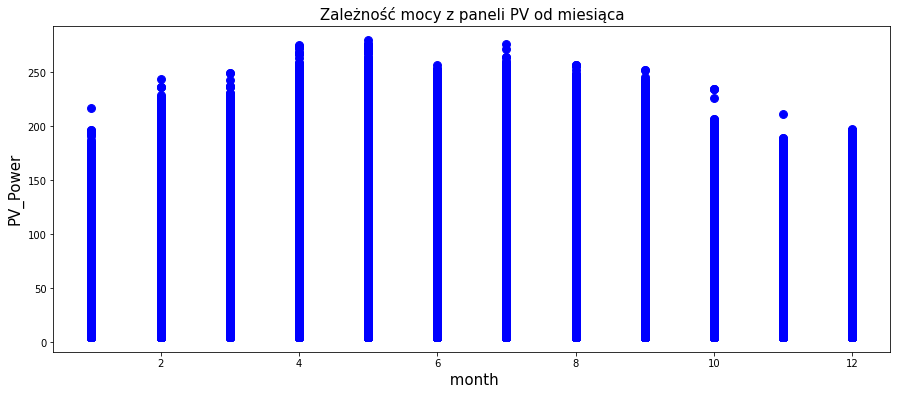

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df2.month, df2.PV_Power, s=250, marker='.',color='blue')
plt.xlabel(' month', fontsize = 15)
plt.ylabel('PV_Power', fontsize = 15)
plt.title('Zależność mocy z paneli PV od miesiąca', fontsize = 15)

---

Zależność mocy z paneli PV od daty (z dokładnymi godzinami)

---

Text(0, 0.5, 'PV_Power [W]')

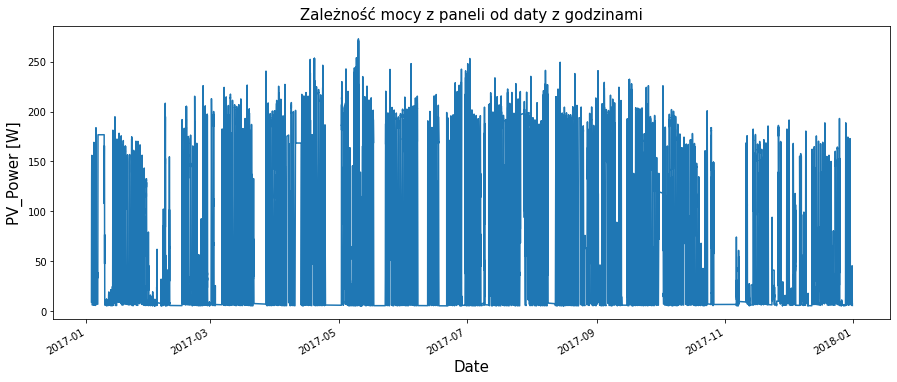

In [ ]:
x=df2.index
y=df2.PV_Power
plt.figure(figsize=(15,6))
df2['PV_Power'].rolling(5).mean().shift().plot()
plt.title('Zależność mocy z paneli od daty z godzinami', fontsize = 15) 
plt.xlabel('Date', fontsize = 15)        
plt.ylabel('PV_Power [W]', fontsize = 15)

---

Zależności w danych. Korelacja (Najlepsza: nasłonecznienie i moc z paneli)

---

In [ ]:
df3.corr()

,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day,hour
PV_Power,1.000000,0.426363,0.819433,0.968673,0.383969,0.218169,-0.087942,NaN,0.030251,0.148631
T_air,0.426363,1.000000,0.768032,0.494211,0.335285,-0.084408,0.107064,NaN,0.001109,-0.034755
hor_irr,0.819433,0.768032,1.000000,0.881286,0.443439,0.064897,-0.117938,NaN,0.006433,-0.014097
30_deg_irr,0.968673,0.494211,0.881286,1.000000,0.393581,0.170244,-0.099925,NaN,0.044590,0.006552
W_speed,0.383969,0.335285,0.443439,0.393581,1.000000,0.230579,-0.127541,NaN,-0.062099,0.097760
W_direct,0.218169,-0.084408,0.064897,0.170244,0.230579,1.000000,0.136032,NaN,0.018277,0.227785
month,-0.087942,0.107064,-0.117938,-0.099925,-0.127541,0.136032,1.000000,NaN,0.022923,-0.009473
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.030251,0.001109,0.006433,0.044590,-0.062099,0.018277,0.022923,NaN,1.000000,-0.015898
hour,0.148631,-0.034755,-0.014097,0.006552,0.097760,0.227785,-0.009473,NaN,-0.015898,1.000000


---

Informacje o danych po modyfikacji

---

In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
PV_Power,302.0,92.149536,36.649014,5.82,70.3025,105.705,117.5725,161.03
T_air,302.0,16.681821,8.502713,0.09,9.1675,17.375,24.6350,33.11
hor_irr,302.0,347.970497,165.732094,0.00,233.4875,349.800,496.7350,690.24
30_deg_irr,302.0,416.718444,178.003784,0.00,298.8050,482.485,546.8225,748.65
W_speed,302.0,1.619172,0.630495,0.29,1.1750,1.565,1.9500,4.16
W_direct,302.0,189.390331,45.482072,80.05,154.7650,192.595,231.2775,263.50
month,302.0,6.612583,3.464903,1.00,4.0000,7.000,9.0000,12.00
year,302.0,2017.000000,0.000000,2017.00,2017.0000,2017.000,2017.0000,2017.00
day,302.0,15.827815,8.694338,1.00,8.0000,16.000,23.0000,31.00
hour,302.0,11.931954,1.233985,5.17,11.7600,11.940,12.1300,22.02


---

Zależność temp od daty 

---

Text(0, 0.5, 'Temp')

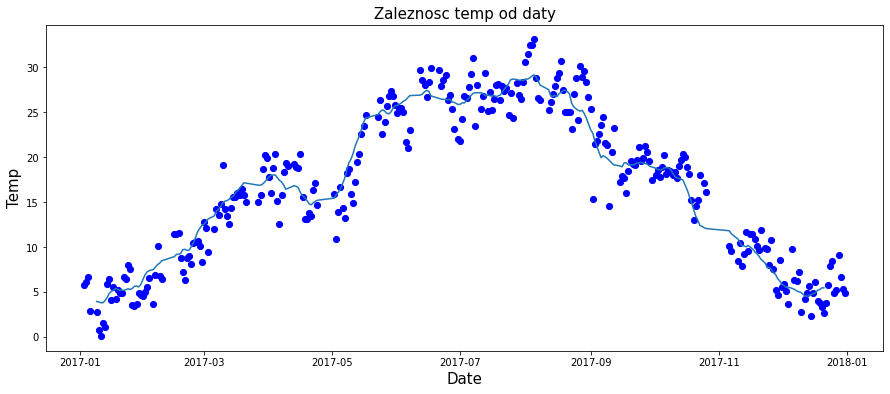

In [ ]:
x=df3.index.astype(object)
y=df3.T_air.astype(object)
plt.figure(figsize=(15,6))
plt.scatter(x, y, s = 150, color = 'blue', marker = '.')
df3.T_air.astype(object).rolling(15).mean().shift(-10).plot()
plt.title('Zaleznosc temp od daty', fontsize = 15) 
plt.xlabel('Date', fontsize = 15)        
plt.ylabel('Temp', fontsize = 15)

---

Zależność mocy z paneli PV od temperatury (nikła zależnośc)

---

Text(0, 0.5, 'PV_Power [W]')

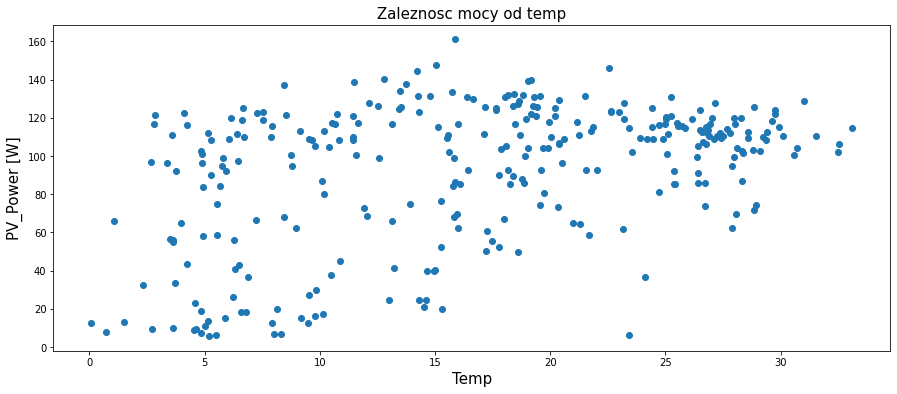

In [ ]:
plt.figure(figsize = (15,6))
plt.scatter(df3.T_air, df3.PV_Power)
plt.title('Zaleznosc mocy od temp', fontsize = 15) 
plt.xlabel('Temp', fontsize = 15)        
plt.ylabel('PV_Power [W]', fontsize = 15)

---

Zależność mocy z paneli PV od temp - wykres słupkowy

---

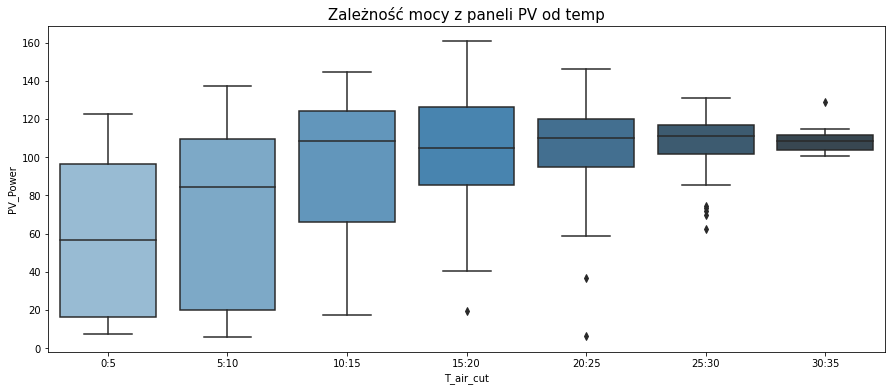

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df3, x="T_air_cut", y="PV_Power", palette="Blues_d")
plt.title('Zależność mocy z paneli PV od temp', fontsize = 15)
plt.show()

---

Zależność nasłonecznienia globalnego poziomego od daty 

---

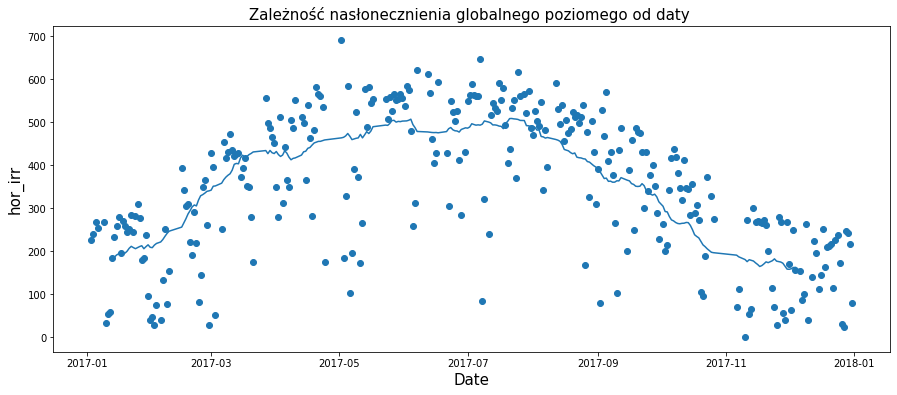

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df3.index, df3['hor_irr'])
plt.xlabel('Date', fontsize = 15)        
plt.ylabel('hor_irr', fontsize = 15)
plt.title('Zależność nasłonecznienia globalnego poziomego od daty ', fontsize =15)
df3['hor_irr'].rolling(35).mean().shift(-25).plot()

---

Zależność mocy od nasłonecznienia globalnego poziomego oraz mierzonego na płaszczyźnie 30st

---

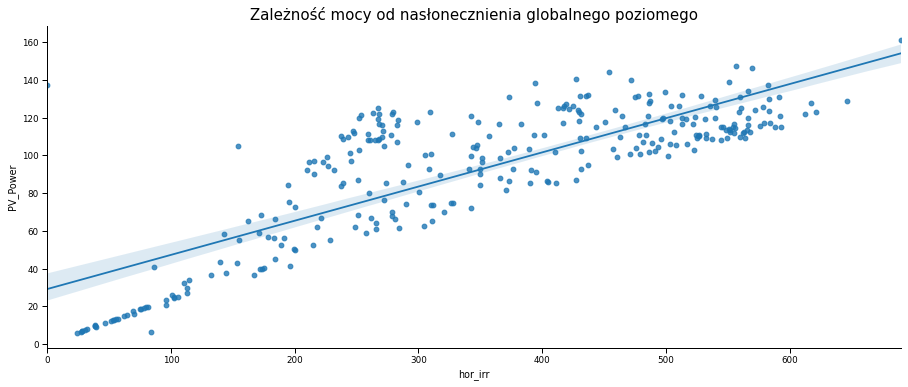

<Figure size 1080x432 with 0 Axes>

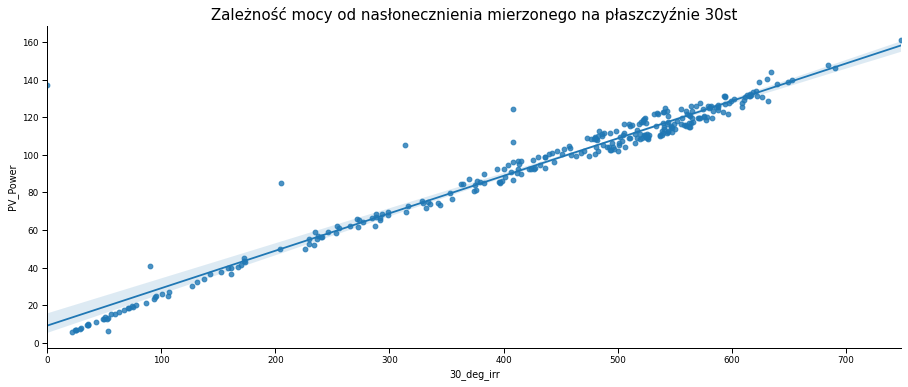

In [ ]:
sns.set_context('paper')
sns.lmplot(data=df3,x="hor_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia globalnego poziomego', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=df3,x="30_deg_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia mierzonego na płaszczyźnie 30st', fontsize = 15)
plt.show()

---

nasłonecznienie na płaszczyźnie w zależności od poziomego 

---

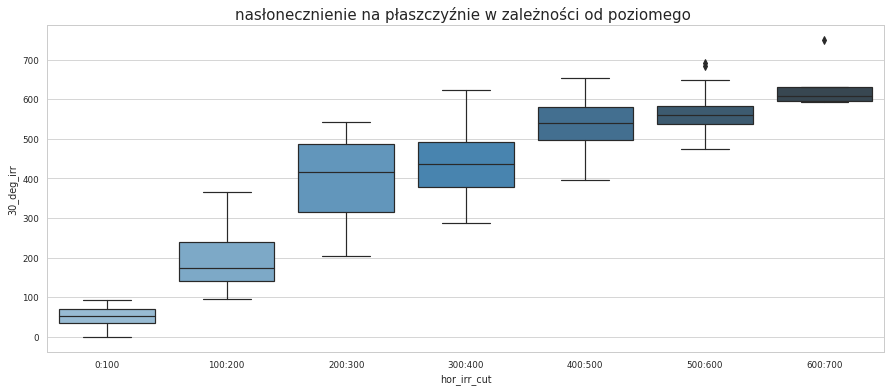

In [ ]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.boxplot(data=df3, x="hor_irr_cut", y="30_deg_irr", palette="Blues_d")
plt.title('nasłonecznienie na płaszczyźnie w zależności od poziomego ', fontsize= 15)
plt.show()

---

Wpływ naslonecznienia i miesiaca na moc z paneli', fontsize = 15) 

---

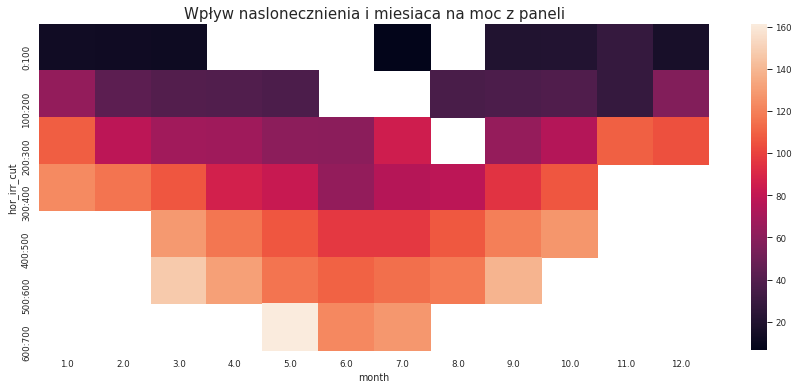

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Wpływ naslonecznienia i miesiaca na moc z paneli', fontsize = 15) 
pivot = df3.pivot_table(
    index=["hor_irr_cut"],
    columns=["month"],
    values="PV_Power",
    aggfunc=np.average)
sns.heatmap(pivot)

---

Wpływ naslonecznienia na płaszczyznie 30st. i miesiaca na moc z paneli

---

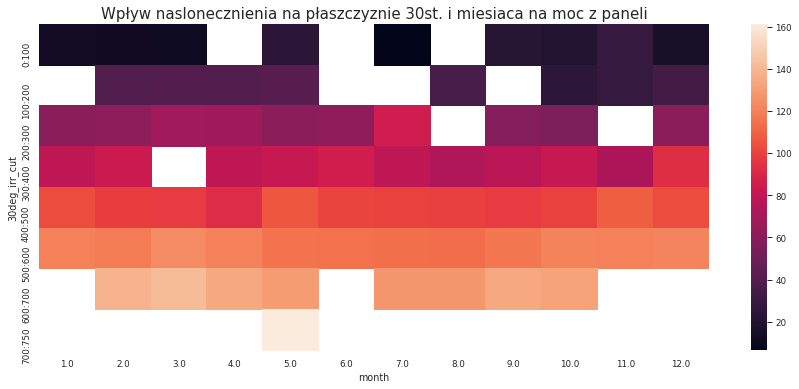

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Wpływ naslonecznienia na płaszczyznie 30st. i miesiaca na moc z paneli', fontsize = 15) 
pivot = df3.pivot_table(
    index=["30deg_irr_cut"],
    columns=["month"],
    values="PV_Power",
    aggfunc=np.average)
sns.heatmap(pivot)

---

Wykres zależności temp od wartości widełek nasłonecznienia poziomego 

---

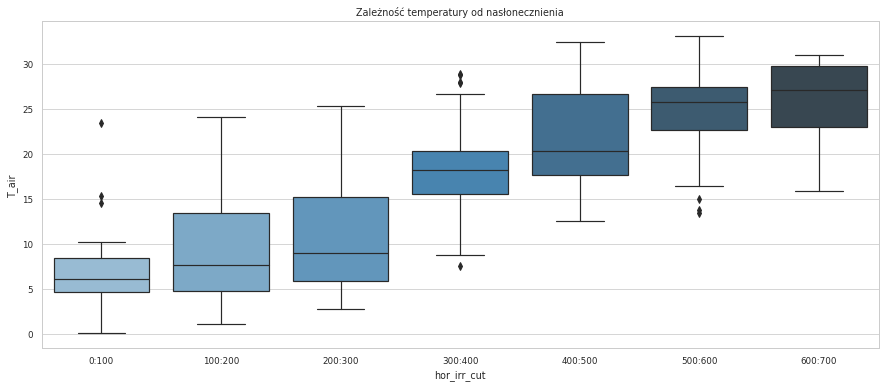

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df3, x="hor_irr_cut", y="T_air", palette='Blues_d')
plt.title('Zależność temperatury od nasłonecznienia')
plt.show()

---

Wpływ szybkości wiatru na nasłonecznienie poziome

---

Text(0.5, 1.0, 'Wpływ szybkości wiatru na nasłonecznienie poziome')

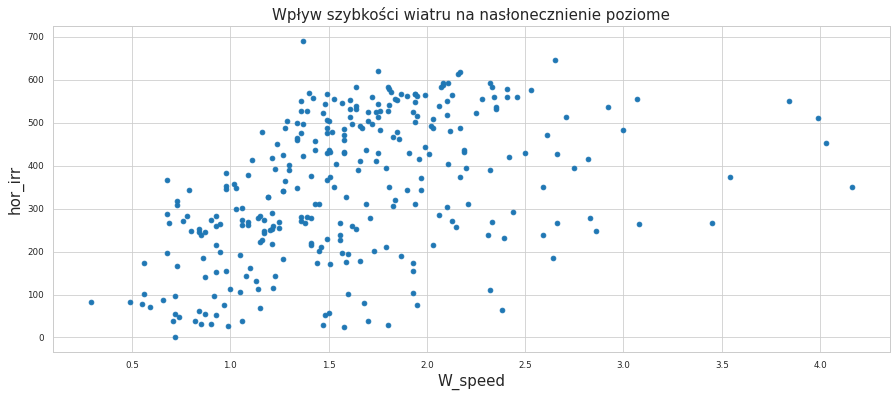

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df3.W_speed, df3['hor_irr'])
plt.xlabel('W_speed', fontsize = 15)        
plt.ylabel('hor_irr', fontsize = 15)
plt.title('Wpływ szybkości wiatru na nasłonecznienie poziome', fontsize=15)

---

Wykres średniej mocy paneli w danych dniach 

---

Text(0, 0.5, 'PV_Power [W]')

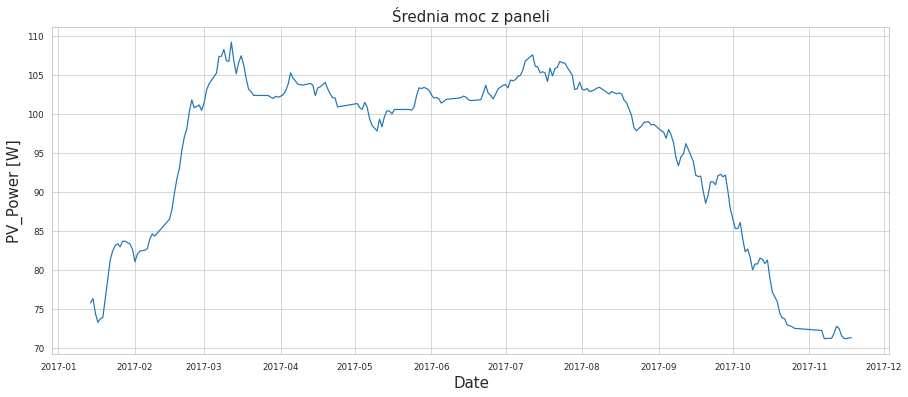

In [ ]:
plt.figure(figsize=(15,6))
df3['PV_Power'].rolling(50).mean().shift(-40).plot()
plt.title('Średnia moc z paneli', fontsize = 15) 
plt.xlabel('Date', fontsize = 15)        
plt.ylabel('PV_Power [W]', fontsize = 15)

---

Wydzielenie danych z lipca i grudnia dla porównania dwóch skrajnych miesięcy

---

In [ ]:
lipiec = df3[df3['month']==7].round(2)
grudzien = df3[df3['month']==12].round(2)

---

Histogram temperatury w lipcu i grudniu

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


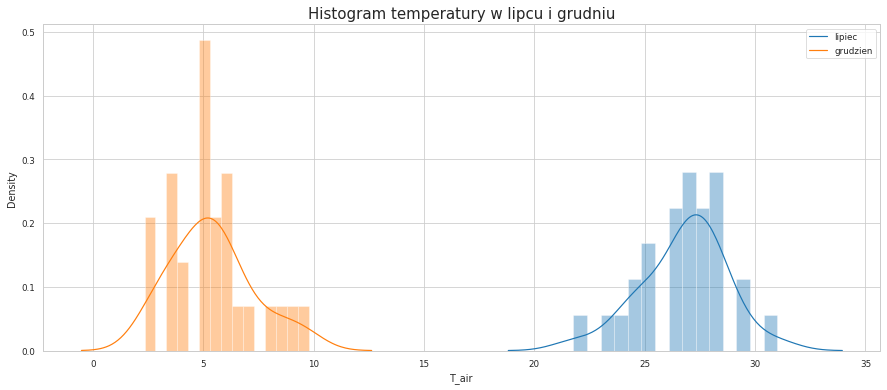

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(lipiec['T_air'], bins=15, kde_kws=dict(label= "lipiec"))
sns.distplot(grudzien['T_air'], bins=15, kde_kws=dict(label= "grudzien"))
plt.legend()
plt.title('Histogram temperatury w lipcu i grudniu', fontsize = 15)
plt.show()

---

Dane dla stycznia dla porównania 

---

In [ ]:
print('Średnie nasłonecznienie w styczniu:')
print(lipiec['hor_irr'].mean())

print()
print('Średnia moc z paneli PV w styczniu:')
print(lipiec['PV_Power'].mean())

Średnie nasłonecznienie w styczniu:
504.573448275862

Średnia moc z paneli PV w styczniu:
105.34206896551721


---

Dane dla grudnia 

---

In [ ]:
print('Średnie nasłonecznienie w grudniu:')
print(grudzien['hor_irr'].mean())

print()
print('Średnia moc z paneli PV w grudniu:')
print(grudzien['PV_Power'].mean())

Średnie nasłonecznienie w grudniu:
163.1579310344828

Średnia moc z paneli PV w grudniu:
68.33586206896551


---

Rozkład wartości mocy w zależności od widełek nasłonecznienia

---

Najbardziej przewidywana jest moc przy skrajnych nasłonecznieniach: b. niskim i b.wysokim

Text(0.5, 1.0, 'Rozkład wartości mocy w zależności od widełek nasłonecznienia poziomego')

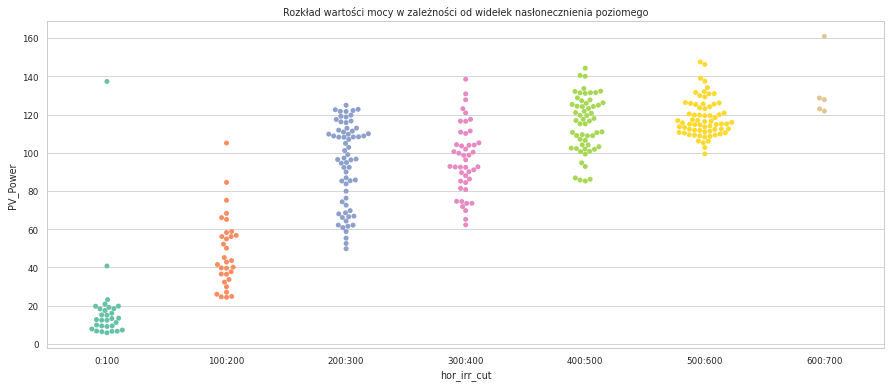

In [ ]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='hor_irr_cut',y='PV_Power',data=df3,size = 5, palette='Set2')
plt.title('Rozkład wartości mocy w zależności od widełek nasłonecznienia poziomego')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Rozkład wartości mocy w zależności od widełek nasłonecznienia na panelu')

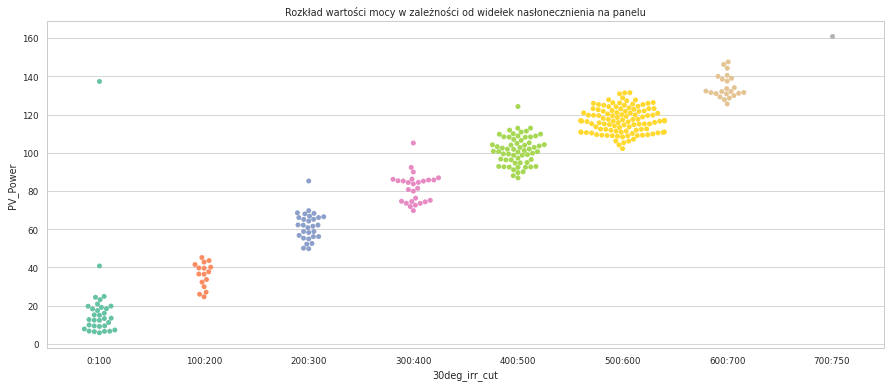

In [ ]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='30deg_irr_cut',y='PV_Power',data=df3,size = 5, palette='Set2')
plt.title('Rozkład wartości mocy w zależności od widełek nasłonecznienia na panelu')

---

Pogrupowanie danych po miesiącach (średnie danych dla każdego miesiąca)

---

In [ ]:
df4['season']=pd.cut(x=df4.index, bins = (0,2,5,8,11,13),labels = ['zima','wiosna','lato','jesień','Zima'])

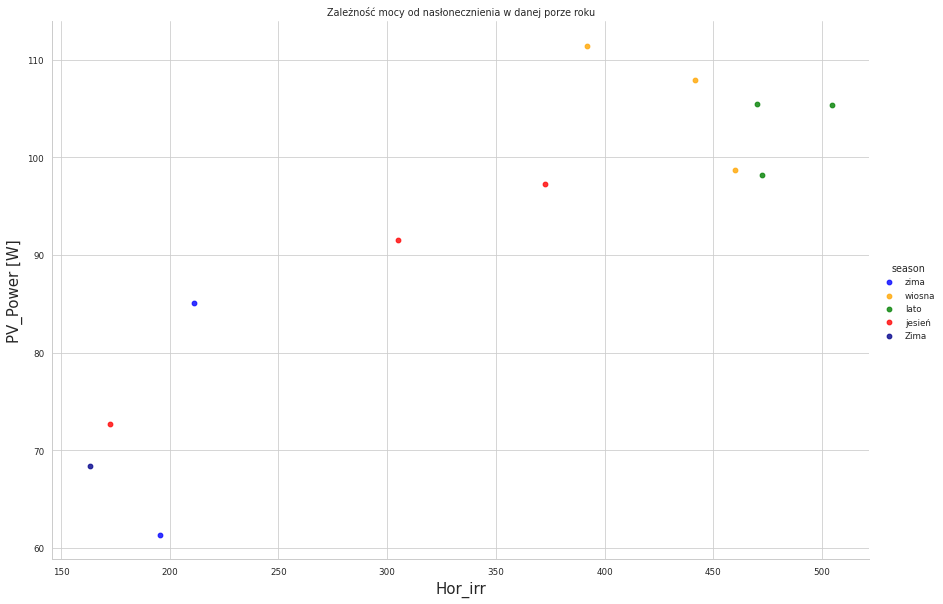

In [ ]:
palette1 = ['blue','orange','green','red','darkblue']
fig1 = sns.lmplot(x = 'hor_irr', y="PV_Power", data=df4, fit_reg=False, legend=True, height=8, aspect=1.5, hue='season',palette=palette1)
fig1.set_axis_labels("Hor_irr", "PV_Power [W]", fontsize = 15)
fig1.set(title='Zależność mocy od nasłonecznienia w danej porze roku');

---

Pogrupowanie danych po godzinach (potrzebne do podzielenia dnia na pory)

---

In [ ]:
df4 = df2.groupby(df2.hour).mean()
df4['time_of_day']=pd.cut(x=df4.index, bins = (4,11,14,17,20),labels = ['morning','noon','afternoon','evening'])
plt.figure(figsize=(15,6))
df4.head()

,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day,time_of_day
hour,,,,,,,,,,
0,147.440000,4.584333,0.000000,0.000000,0.301833,263.301667,12.000000,2017.0,7.000000,NaN
5,8.405479,20.243529,65.928321,40.142857,1.060476,167.691830,6.109774,2017.0,15.879198,morning
6,20.594087,18.782180,128.099578,102.343090,1.019603,169.139167,6.349728,2017.0,15.721937,morning
7,46.453367,17.356374,210.148433,208.017854,1.116169,171.213210,6.512631,2017.0,15.583096,morning
8,74.624549,15.671027,294.356567,331.186045,1.232002,170.844770,6.520438,2017.0,15.904058,morning


<Figure size 1080x432 with 0 Axes>

---

Pogrupowanie danych po tych porach dnia

---

In [ ]:
import plotly.express as px

df4 = df4.groupby(df4.time_of_day).mean()
df4=df4.round(2)
df4.head()

,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day
time_of_day,,,,,,,,,
morning,76.14,17.14,303.26,345.55,1.28,174.88,6.44,2017.0,15.83
noon,137.37,18.28,524.72,635.86,1.88,195.48,6.55,2017.0,15.85
afternoon,60.18,21.35,277.31,285.02,2.09,205.77,6.25,2017.0,15.64
evening,49.49,26.12,58.96,33.77,1.96,221.12,6.51,2017.0,14.08


---

Wykres kołowy przedstawiający prędkość wiatru w zależności od pory dnia

---

In [ ]:
labels = df4.index
values = df4.W_speed

fig = px.pie(values=values, names=labels, width=1000, height=400, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label+value',marker=dict(line=dict(color='#FFFFFF', width=2)),textfont_size=12)
fig.show()

---

Wykres kołowy przedstawiający moc z paneli w zależności od pory dnia

---

In [ ]:
labels = df4.index
values = df4.PV_Power

fig = px.pie(values=values, names=labels, width=1000, height=400, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label+value',marker=dict(line=dict(color='#FFFFFF', width=2)),textfont_size=12)
fig.show()

---

Wykres kołowy przedstawiający nasłonecznienie w zależności od pory dnia

---

In [ ]:
labels = df4.index
values = df4['hor_irr']

fig = px.pie(values=values, names=labels, width=1000, height=400, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label+value',marker=dict(line=dict(color='#FFFFFF', width=2)),textfont_size=12)
fig.show()

---

Pogrupowanie danych po widełkach z wartościami prędkości wiatru

---

In [ ]:
df_Wind=df3.groupby(df3.W_speed_cut).mean()
df_Wind=df_Wind.round(2)
df_Wind

,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day,hour
W_speed_cut,,,,,,,,,,
0:0.5,13.09,15.78,82.53,65.50,0.39,167.07,4.50,2017.0,15.50,8.26
0.5:1,61.46,9.61,179.98,254.94,0.81,187.60,7.21,2017.0,15.98,11.83
1:2,94.88,17.33,362.79,433.38,1.51,180.16,6.60,2017.0,15.96,11.96
2:2.5,103.96,21.15,442.80,478.92,2.21,210.10,6.64,2017.0,16.29,11.93
2:3,112.96,17.42,403.64,502.97,2.71,217.39,5.75,2017.0,12.50,12.35
3:4,121.40,17.61,420.00,554.06,3.49,246.23,6.33,2017.0,17.33,11.92
4:4.5,121.56,15.02,402.52,535.15,4.10,242.63,3.00,2017.0,12.50,12.04


---

Zależność mocy od prędkości wiatru. Moim zdaniem dlatego jest większa moc bo wiatr przenosi chmury, które powodują cień

---

Text(0.5, 1.0, 'Zależność mocy od prędkości wiatru.')

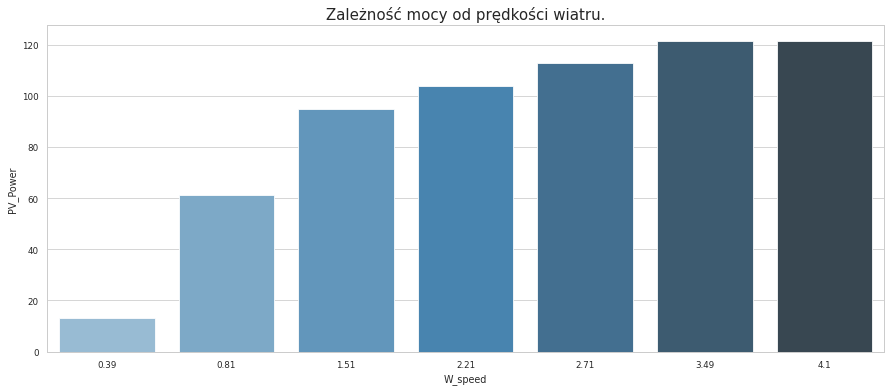

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_Wind, x='W_speed', y='PV_Power', palette='Blues_d')
plt.title('Zależność mocy od prędkości wiatru.', fontsize = 15)

---


Widać zależność liniową pomiędzy nasłonecznieniem, a mocą z paneli PV więc można skonstruować model regresyjny do przewidywania wartości mocy. 

Można także zaproponować model klasyfikujący miesiące korzystając z danych nasłonecznienia, aby wiedzieć kiedy w ciągu roku będzie największa moc z paneli PV. 

Patrząc na wykresy związane z porami dnia można wykorzystać model klasyfikujący porę dnia w zależności od nasłonecznienia, aby wiedzieć kiedy będzie najwięcej energii z paneli w ciągu dnia.

---

---

---


# **TASK 2**


--- 

---

---

---

Załadowanie drugiego datasetu i czyszczenie danych 

---

In [ ]:
dfprev=df3.copy()
from  google.colab import files
uploaded= files.upload()
dfnew = pd.read_csv('history_data.csv')
dfnew.drop(['Name'], axis=1, inplace=True)
dfnew.drop([0,1], inplace=True)
dfnew.reset_index(drop=True, inplace=True)
dfnew=dfnew.set_index('Date time')
dfnew.index = pd.to_datetime(dfnew.index)
dfnew.index = dfnew.index.to_series().dt.strftime("%Y-%m-%d")
dfnew2 = dfnew.copy()
dfnew2.index = pd.to_datetime(dfnew2.index)
dfnew2 = dfnew2.groupby(dfnew2.index.date).mean()
dfconcatcopy = pd.concat([dfnew2, dfprev], axis=1)
dfconcat = dfconcatcopy
dfconcat['Wind Speed'] = dfconcat['Wind Speed']*1600/3600
dfconcat.W_speed = dfconcat.W_speed*3.6
dfconcat['W_direct'] = dfconcat['W_direct'].interpolate()
dfconcat.W_speed = dfconcat.W_speed.interpolate()
dfconcat.T_air = dfconcat.T_air.interpolate()

Saving history_data.csv to history_data (1).csv


---

PORÓWNANIE REALNEJ POGODY Z POGODĄ Z DATASET NR 1

---

In [ ]:
dfconcat.corr().loc[['T_air'], ['Temperature']].round(2)

,Temperature
T_air,0.98


In [ ]:
dfconcat.corr().loc[['W_direct'], ['Wind Direction']].round(2)

,Wind Direction
W_direct,0.69


In [ ]:
dfconcat.corr().loc[['W_speed'], ['Wind Speed']].round(2)

,Wind Speed
W_speed,0.51


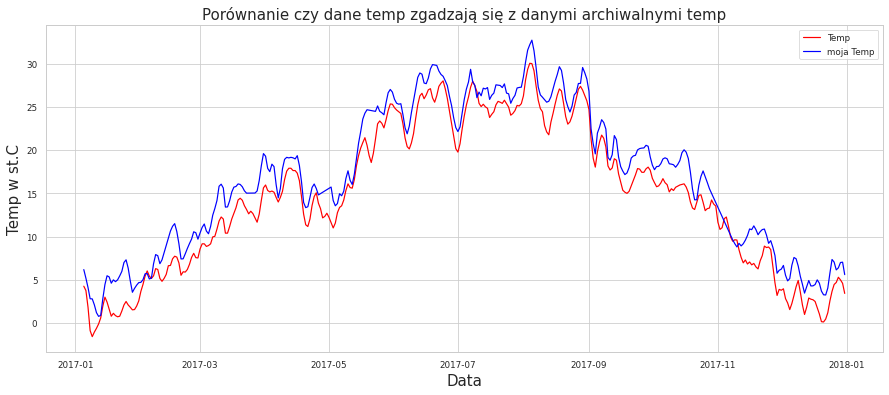

In [ ]:
plt.figure(figsize=(15,6))
x = dfconcat.index
plt.plot(x, dfconcat.Temperature.rolling(3).mean() , 'r', label = 'Temp')
plt.plot(x, dfconcat.T_air.rolling(3).mean(), 'b',label='moja Temp')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Porównanie czy dane temp zgadzają się z danymi archiwalnymi temp',fontsize = 15)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Temp w st.C', fontsize = 15)
plt.show()

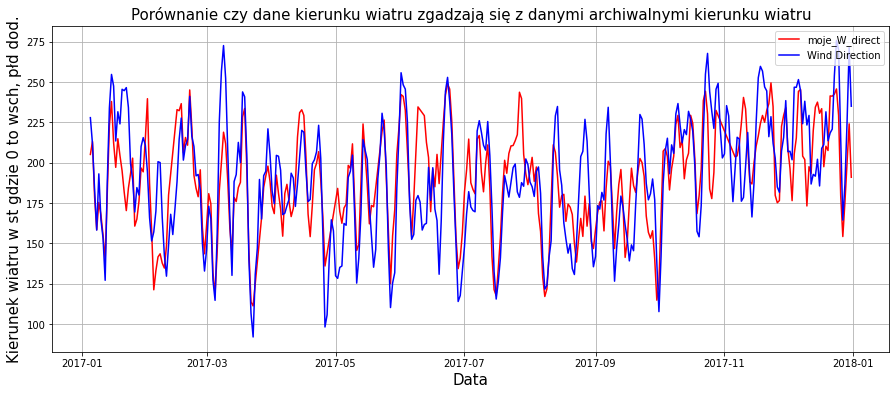

In [ ]:
plt.figure(figsize=(15,6))
x = dfconcat.index
plt.plot(x, dfconcat.W_direct.rolling(3).mean() , 'r', label = 'moje_W_direct')
plt.plot(x, dfconcat['Wind Direction'].rolling(3).mean(), 'b',label='Wind Direction')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Porównanie czy dane kierunku wiatru zgadzają się z danymi archiwalnymi kierunku wiatru',fontsize = 15)
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Kierunek wiatru w st gdzie 0 to wsch, płd dod.',fontsize = 15)
plt.show()

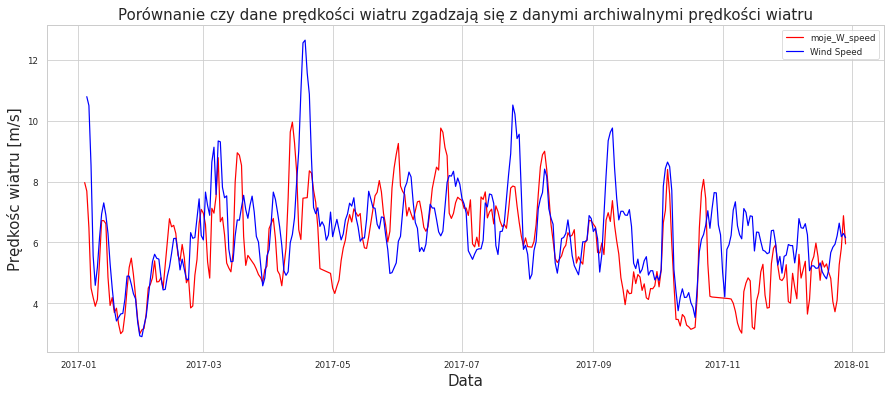

In [ ]:
plt.figure(figsize=(15,6))
x = dfconcat.index
plt.plot(x, dfconcat.W_speed.rolling(4).mean().shift(-2), 'r', label = 'moje_W_speed')
plt.plot(x, dfconcat['Wind Speed'].rolling(5).mean().shift(-2), 'b',label='Wind Speed')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Porównanie czy dane prędkości wiatru zgadzają się z danymi archiwalnymi prędkości wiatru',fontsize = 15)
plt.xlabel('Data',fontsize = 15)
plt.ylabel('Prędkośc wiatru [m/s]',fontsize = 15)
plt.show()

---

POLACZENIE OBU DATASETOW

---

In [ ]:
dfnew.index = pd.to_datetime(dfnew.index)
dfnew = dfnew.groupby(dfnew.index.date).mean()
dfconcatcopy = pd.concat([dfnew, dfprev], axis=1)
dfconcatcopy.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day,hour,T_air_cut,W_speed_cut,W_dir_cut,hor_irr_cut,30deg_irr_cut,PV_Power_cut
2017-01-03,7.9,-1.7,2.4,-2.1,NaN,0.04,NaN,NaN,12.9,175.50,64.9,8.1,5.9,84.74,99.08,5.81,225.85,430.52,1.56,117.49,1.0,2017.0,3.0,12.06,5:10,1:2,100:125,200:300,400:500,small
2017-01-04,9.9,-2.9,4.0,-5.4,NaN,0.00,NaN,NaN,31.1,248.71,53.2,8.3,3.5,71.66,108.85,6.07,239.42,472.94,2.59,261.79,1.0,2017.0,4.0,12.09,5:10,2:3,230:265,200:300,400:500,medium
2017-01-05,8.7,2.8,6.4,-2.5,NaN,0.04,NaN,NaN,42.7,259.67,70.3,13.3,8.3,25.77,124.93,6.68,267.42,541.33,3.45,236.15,1.0,2017.0,5.0,12.19,5:10,3:4,230:265,200:300,500:600,medium
2017-01-06,3.9,-3.1,0.9,-4.4,NaN,0.00,NaN,NaN,25.3,126.71,77.7,28.0,0.0,32.19,121.65,2.83,253.70,535.39,1.25,141.53,1.0,2017.0,6.0,9.63,0:5,1:2,125:150,200:300,500:600,medium
2017-01-07,2.0,-5.1,-1.8,-7.4,NaN,0.00,NaN,NaN,9.4,163.25,30.7,23.0,0.0,52.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

Korelacja danych 

---

In [ ]:
dfconcatcopy.corr().round(2)

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,PV_Power,T_air,hor_irr,30_deg_irr,W_speed,W_direct,month,year,day,hour
Maximum Temperature,1.00,0.92,0.98,0.73,0.93,-0.03,NaN,-0.03,0.13,-0.07,-0.03,0.38,-0.37,-0.56,0.46,0.98,0.78,0.52,0.40,-0.01,0.09,NaN,-0.01,-0.07
Minimum Temperature,0.92,1.00,0.97,0.93,0.74,0.10,NaN,-0.03,0.14,-0.24,-0.02,0.21,-0.07,-0.39,0.20,0.94,0.61,0.27,0.34,-0.14,0.13,NaN,-0.01,-0.07
Temperature,0.98,0.97,1.00,0.88,0.91,0.03,NaN,-0.08,0.14,-0.16,-0.02,0.32,-0.23,-0.51,0.34,0.98,0.71,0.41,0.38,-0.07,0.10,NaN,-0.01,-0.08
Wind Chill,0.73,0.93,0.88,1.00,NaN,0.11,NaN,0.08,0.16,-0.23,0.14,-0.00,0.18,0.02,-0.01,0.79,0.28,0.02,0.04,-0.15,-0.02,NaN,-0.06,-0.14
Heat Index,0.93,0.74,0.91,NaN,1.00,0.01,NaN,NaN,-0.11,0.24,-0.08,0.03,-0.12,0.09,-0.30,0.73,-0.20,-0.25,-0.05,0.12,0.06,NaN,-0.03,-0.08
Precipitation,-0.03,0.10,0.03,0.11,0.01,1.00,NaN,-0.38,0.23,-0.27,0.31,-0.19,0.48,0.28,-0.26,-0.00,-0.14,-0.25,0.03,-0.20,0.04,NaN,-0.06,0.02
Snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snow Depth,-0.03,-0.03,-0.08,0.08,NaN,-0.38,NaN,1.00,-0.58,-0.51,-0.49,-0.46,-0.15,0.51,-0.75,-0.05,-0.81,-0.74,-0.60,-0.02,0.50,NaN,-0.55,-0.88
Wind Speed,0.13,0.14,0.14,0.16,-0.11,0.23,NaN,-0.58,1.00,-0.06,0.61,0.06,0.04,-0.25,0.17,0.13,0.16,0.15,0.51,-0.02,-0.05,NaN,-0.14,-0.09
Wind Direction,-0.07,-0.24,-0.16,-0.23,0.24,-0.27,NaN,-0.51,-0.06,1.00,-0.02,0.13,-0.40,-0.10,0.23,-0.14,0.00,0.18,0.14,0.69,0.13,NaN,0.01,0.13


---

WARTOŚCI KTORE MAJA NAJLEPSZA KORELACJE Z MOCĄ Z PANELI (większa od 0.5)

---

In [ ]:
dfconcatcopy.corr().loc[['30_deg_irr', 'hor_irr', 'Cloud Cover', 'Relative Humidity', 'Visibility'], ['PV_Power']].round(2)

,PV_Power
30_deg_irr,0.97
hor_irr,0.82
Cloud Cover,-0.76
Relative Humidity,-0.62
Visibility,0.53


---

Wykresy zależności mocy z paneli od tych wartości

---

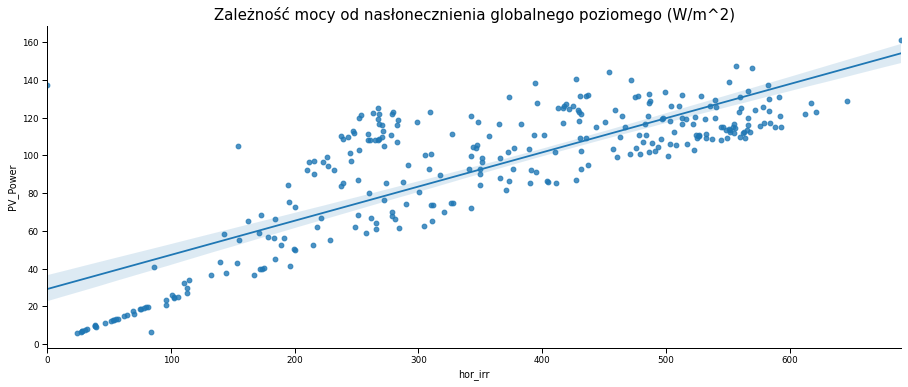

<Figure size 1080x432 with 0 Axes>

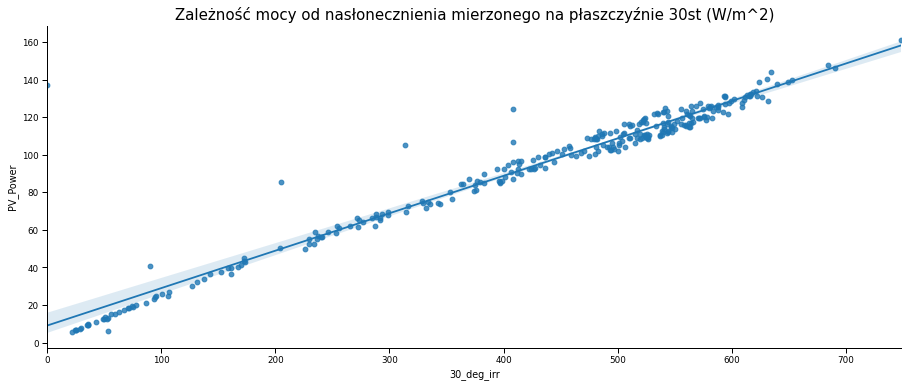

<Figure size 1080x432 with 0 Axes>

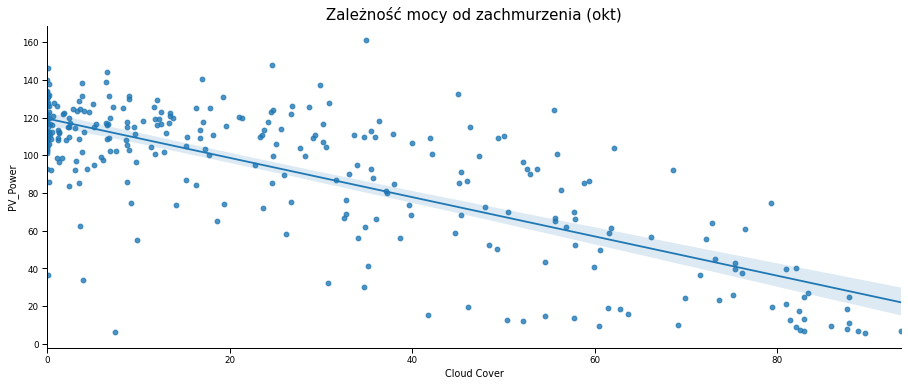

<Figure size 1080x432 with 0 Axes>

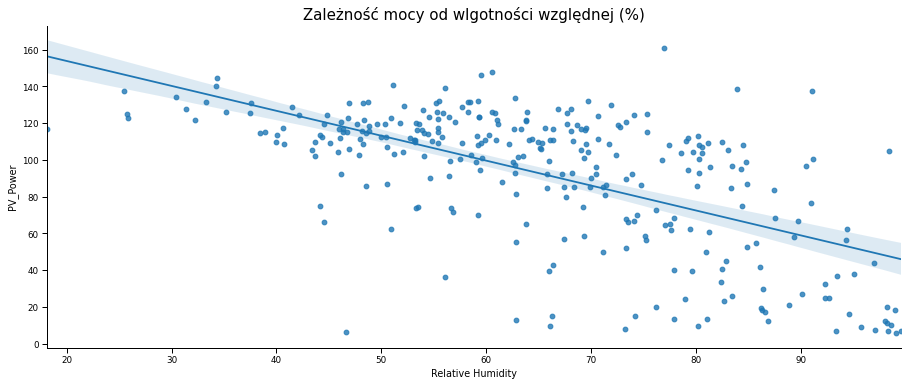

<Figure size 1080x432 with 0 Axes>

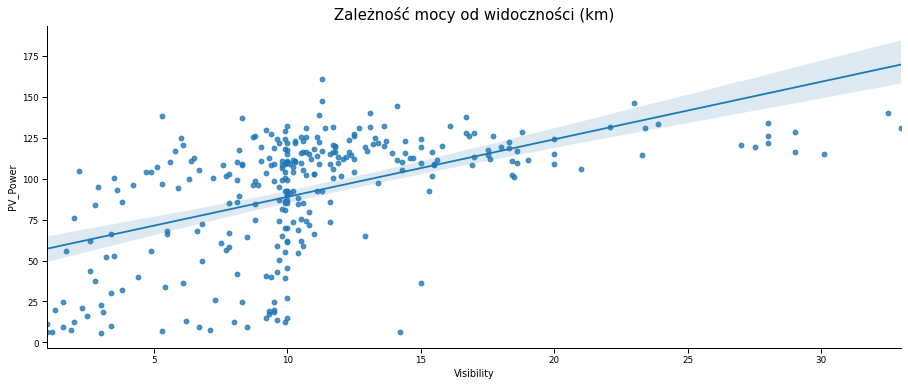

In [ ]:
sns.set_context('paper')
sns.lmplot(data=dfconcatcopy,x="hor_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia globalnego poziomego (W/m^2)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="30_deg_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia mierzonego na płaszczyźnie 30st (W/m^2)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Cloud Cover",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od zachmurzenia (okt)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Relative Humidity",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od wlgotności względnej (%)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Visibility",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od widoczności (km)', fontsize = 15)
plt.show()

---

Analiza i usnięcie outlierów ze względu na rzadkie występowanie (wyjątki)

---

In [ ]:
dfconcatcopy.reset_index(inplace=True)
dfconcatcopy.drop(labels=[337,186,311,338,350,169,189,235,119,106,285], axis=0, inplace=True)
dfconcatcopy.drop(['PV_Power_cut','hour','day','month','year','T_air_cut','W_speed_cut','W_dir_cut','hor_irr_cut','30deg_irr_cut','Maximum Temperature','Minimum Temperature','Wind Chill','Temperature','Precipitation','Snow','Wind Speed','Heat Index','Snow Depth','Wind Direction','Wind Gust','W_direct', 'T_air', 'W_speed'], axis=1, inplace=True)
dfconcatcopy=dfconcatcopy.dropna(axis = 0,how ='any',thresh = None,subset = None,inplace = False)

---

Porównanie korelacji po usnięciu outlierów

---

In [ ]:
dfconcatcopy.corr().loc[['30_deg_irr', 'hor_irr', 'Cloud Cover', 'Relative Humidity', 'Visibility'],['PV_Power']].round(2)

,PV_Power
30_deg_irr,1.00
hor_irr,0.84
Cloud Cover,-0.79
Relative Humidity,-0.66
Visibility,0.56


---

Wykresy zależności mocy od tych wartości po usunięciu outlierów

---

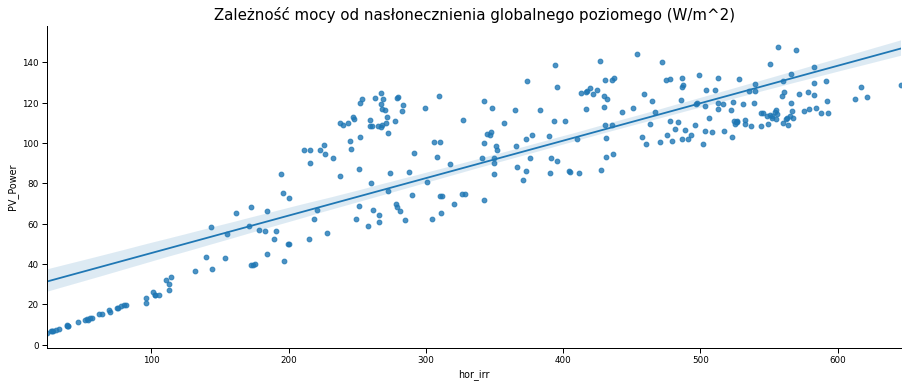

<Figure size 1080x432 with 0 Axes>

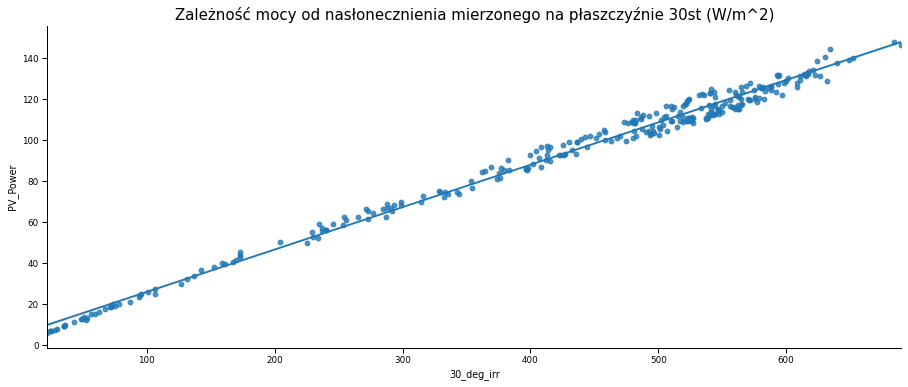

<Figure size 1080x432 with 0 Axes>

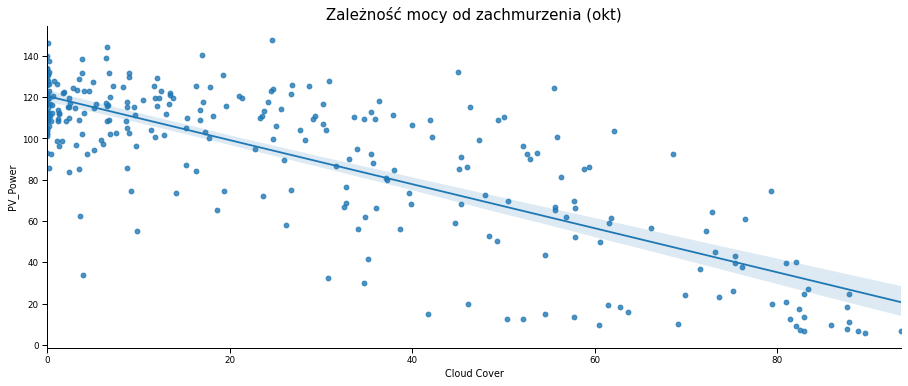

<Figure size 1080x432 with 0 Axes>

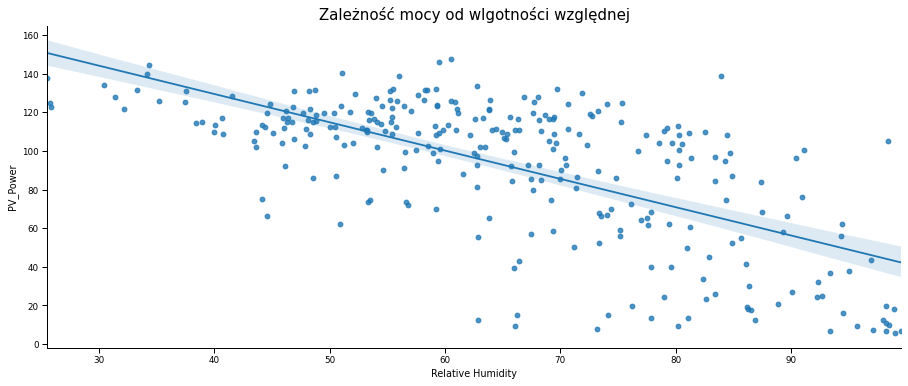

<Figure size 1080x432 with 0 Axes>

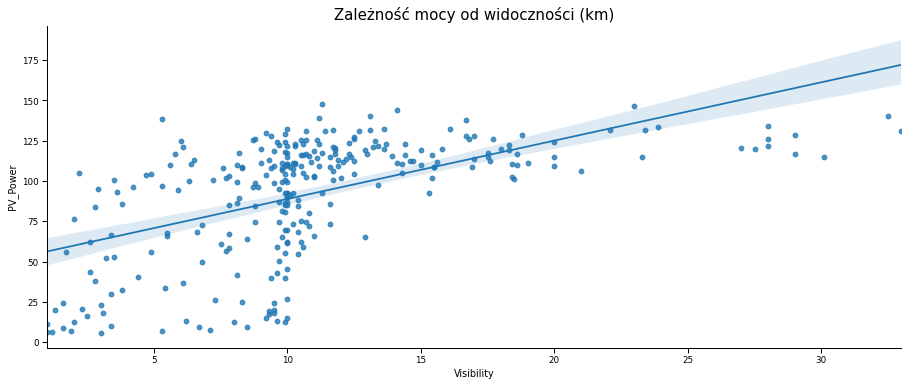

In [ ]:
sns.set_context('paper')
sns.lmplot(data=dfconcatcopy,x="hor_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia globalnego poziomego (W/m^2)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="30_deg_irr",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od nasłonecznienia mierzonego na płaszczyźnie 30st (W/m^2)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Cloud Cover",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od zachmurzenia (okt)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Relative Humidity",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od wlgotności względnej (%)', fontsize = 15)
plt.figure(figsize=(15,6))
sns.lmplot(data=dfconcatcopy,x="Visibility",y="PV_Power",aspect=2.5)
plt.title('Zależność mocy od widoczności (km)', fontsize = 15)
plt.show()

In [ ]:
dfconcatcopy.set_index('index', inplace=True)
dfconcatcopy.index = pd.to_datetime(dfconcatcopy.index)

In [ ]:
seed_value = 35
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

---

REGRESJA LINIOWA

---


intercept:  150.86
Slope:  [0.81305698 0.6068774  0.25726781]
Root Mean Squared Error (RMSE): 20.16
Coefficient of determination: 0.68



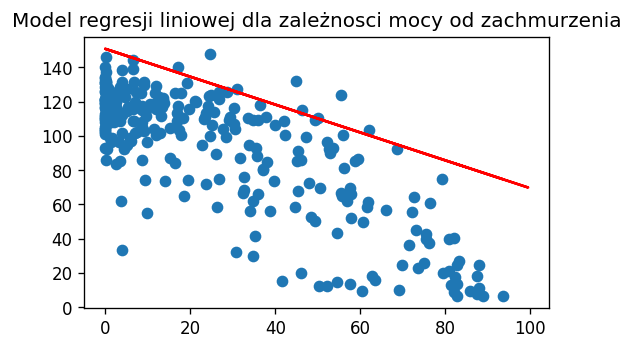

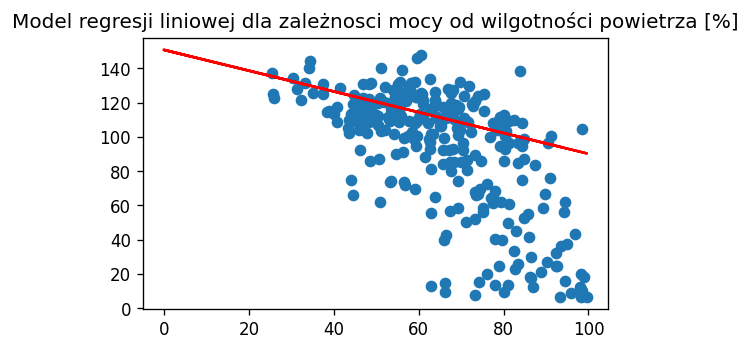

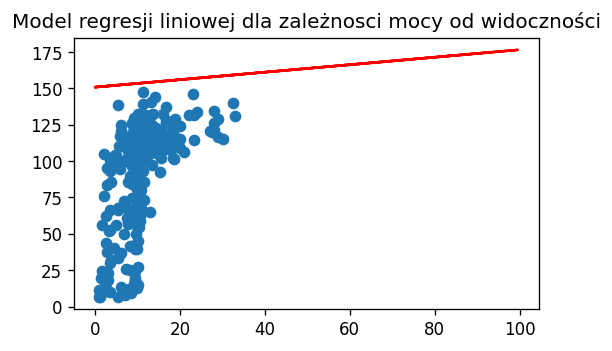

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



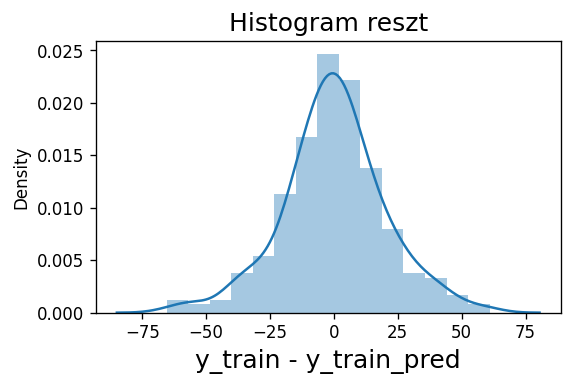

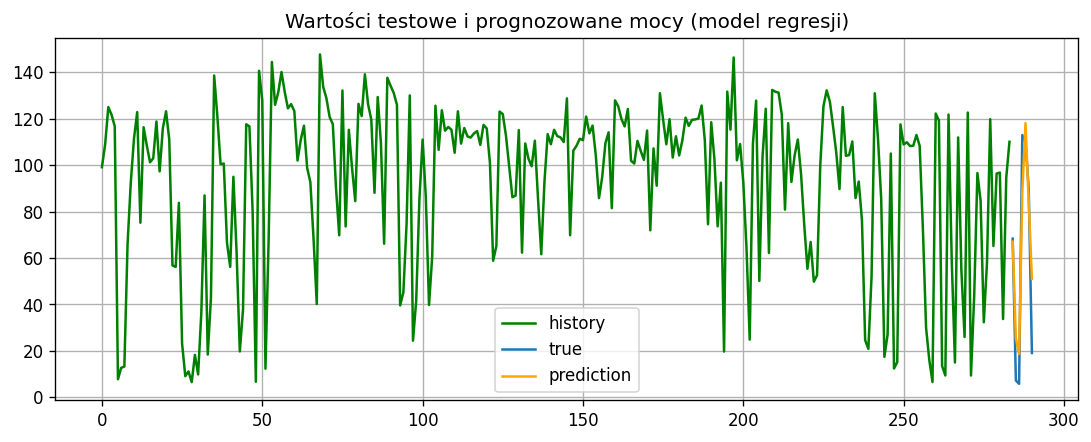

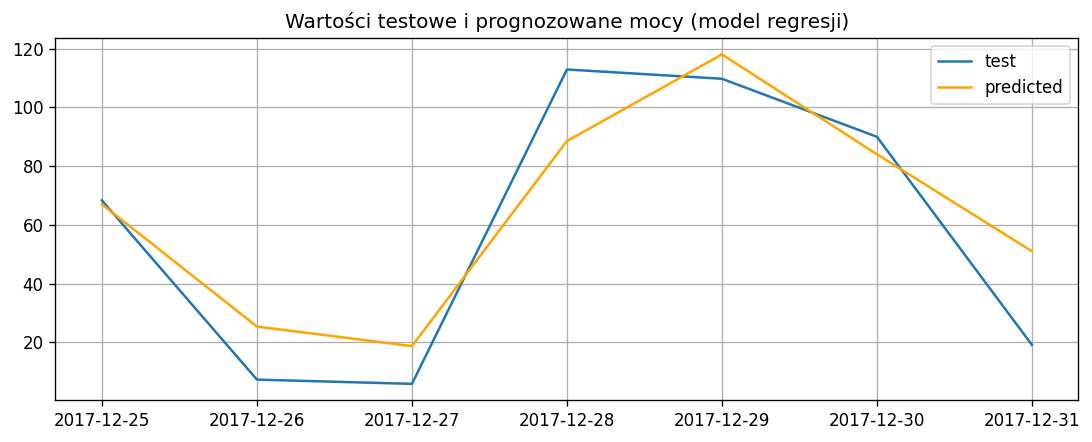

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = dfconcatcopy

X_train = df[['Cloud Cover', 'Relative Humidity', 'Visibility']].head(284)
Y_train = df['PV_Power'].head(284)
X_test = df[['Cloud Cover', 'Relative Humidity', 'Visibility']].tail(7)
Y_test = df['PV_Power'].tail(7)

model = LinearRegression()
model.fit(X_train,Y_train, sample_weight=None)

Y_pred_train = model.predict(X_train)
Y_pred = model.predict(X_test)

features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficients'])
features.coefficients = features.coefficients.abs()

stdevs = []
for i in X_train.columns:
    stdevs.append(df[i].std())
 
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficients"] * features["stdev"]
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

print('\nintercept: ', model.intercept_.round(2))
print('Slope: ', model.coef_)
print('Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(Y_train, Y_pred_train)).round(2))
print('Coefficient of determination: %.2f\n'% r2_score(Y_train, Y_pred_train).round(2))

plt.figure(figsize=(5,3))
plt.scatter(X_train['Cloud Cover'], Y_train)
plt.plot(X_train, 150.86  -0.81305698 *X_train, 'r')
plt.title('Model regresji liniowej dla zależnosci mocy od zachmurzenia')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(X_train['Relative Humidity'], Y_train)
plt.plot(X_train, 150.86  -0.6068774 *X_train, 'r')
plt.title('Model regresji liniowej dla zależnosci mocy od wilgotności powietrza [%]')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(X_train['Visibility'], Y_train)
plt.plot(X_train, 150.86  +0.25726781 *X_train, 'r')
plt.title('Model regresji liniowej dla zależnosci mocy od widoczności')
plt.show()

res = (Y_train - Y_pred_train)

fig = plt.figure(figsize=(5,3))
sns.distplot(res, bins = 15)
plt.title('Histogram reszt', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

dfcompare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dfcompare['data'] = dfcompare.index
dfcompare['data'] = pd.to_datetime(dfcompare.data)
dfcompare['data'] = dfcompare['data'].dt.strftime("%m-%d-%Y")
dfcompare.sort_values(by='data', inplace=True)
dfcompare.set_index(dfcompare['data'])
dfcompare.drop(labels='data', axis=1, inplace=True)

plt.figure(figsize=(11,4))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test ,label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred, 'orange', label="prediction")
plt.title('Wartości testowe i prognozowane mocy (model regresji)')
plt.legend()
plt.grid()

plt.figure(figsize=(11,4))
plt.plot(dfcompare.index,Y_test, label='test')
plt.plot(dfcompare.index,Y_pred, 'orange', label='predicted')
plt.title('Wartości testowe i prognozowane mocy (model regresji)')
plt.legend()
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score as r2

RMSE_RL = round(np.sqrt(mse(Y_test, Y_pred)),2)
MSE_RL = round(mse(Y_test, Y_pred),2)
MAE_RL = round(mae(Y_test, Y_pred),2)
R2_RL = round(r2(Y_test, Y_pred),2)

print('\nRMSE dla przewidywania metoda regresji liniowej wynosi: ',RMSE_RL)
print('\nMSE dla przewidywania metoda regresji liniowej wynosi: ',MSE_RL)
print('\nMAE dla przewidywania metoda regresji liniowej wynosi: ',MAE_RL)
print('\nR2 dla przewidywania metoda regresji liniowej wynosi: ',R2_RL)


RMSE dla przewidywania metoda regresji liniowej wynosi:  17.77

MSE dla przewidywania metoda regresji liniowej wynosi:  315.67

MAE dla przewidywania metoda regresji liniowej wynosi:  14.68

R2 dla przewidywania metoda regresji liniowej wynosi:  0.84


In [ ]:
features = pd.DataFrame(features)
features.round(2)

,coefficients,stdev,importance,importance_normalized
Cloud Cover,0.81,27.01,21.96,100.00
Relative Humidity,0.61,16.43,9.97,45.41
Visibility,0.26,5.57,1.43,6.53


<BarContainer object of 3 artists>

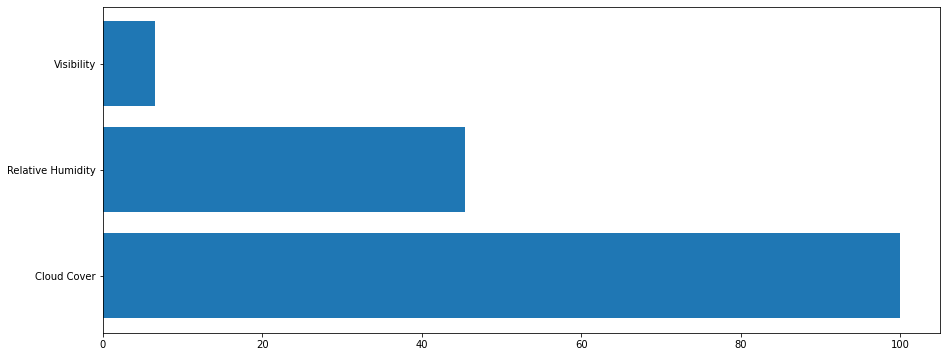

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.barh(features.index, features.importance_normalized)

---

AR (1,0,0)

---

In [ ]:
Xtrain=df[['Cloud Cover', 'Visibility', 'Relative Humidity']].iloc[:-7]
Xtest=df[['Cloud Cover', 'Visibility', 'Relative Humidity']].iloc[-7:]

Ytrain=df['PV_Power'].iloc[:-7]
Ytest=df['PV_Power'].iloc[-7:]

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Xtrain['Cloud Cover'], autolag='AIC')
t_stat, p_value, _, _, critical_values, _  = adfuller(Xtrain['Cloud Cover'], autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

ADF Statistic: -8.98
Critial Values:
   1%, -3.45
Critial Values:
   5%, -2.87
Critial Values:
   10%, -2.57

p-value: 0.00
Stationary


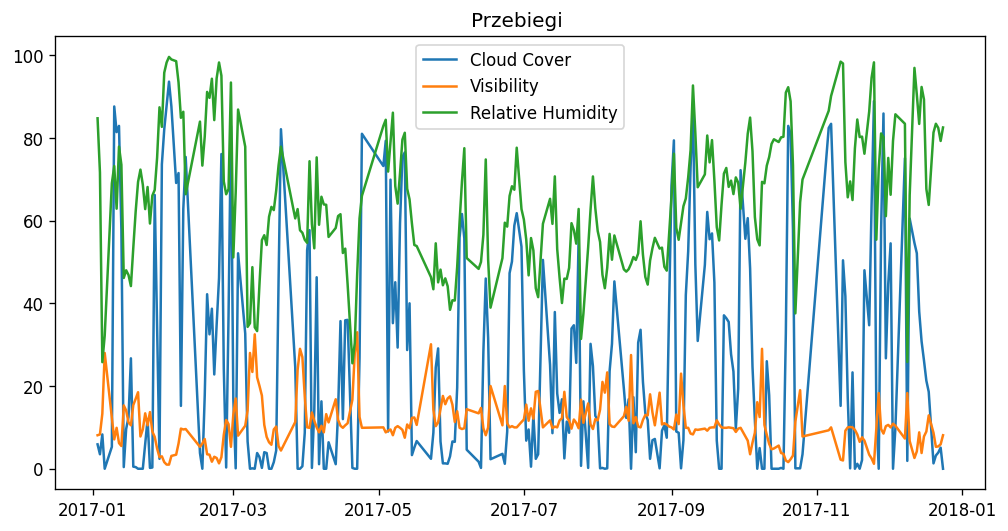

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 1, sharex=True)
axes.plot(Xtrain.index,Xtrain.values); axes.set_title('Przebiegi '); labels=['Cloud Cover', 'Visibility', 'Relative Humidity']
plt.legend(labels)
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(X = Xtrain, y=Ytrain, start_p=0,start_q=0, max_q=0, trace= True, suppress_warnings=True,d=0)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2522.111, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2512.768, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2699.341, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2514.678, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2686.168, Time=0.16 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.564 seconds


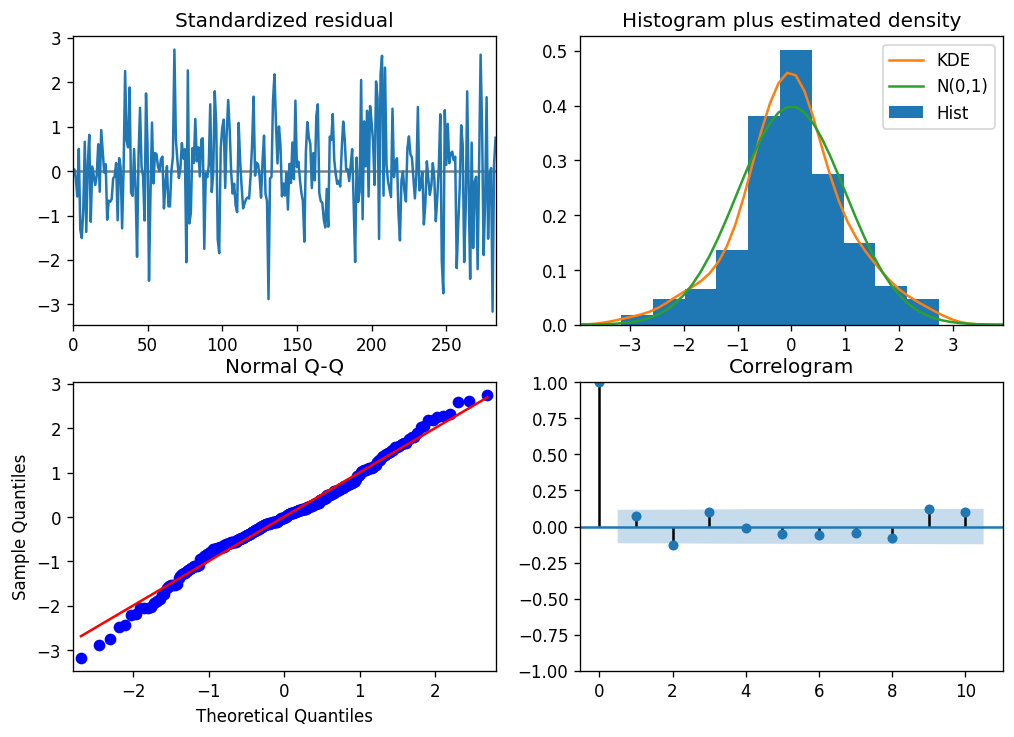

In [ ]:
stepwise_fit.plot_diagnostics(figsize=(10,7))
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(endog = Ytrain, exog = Xtrain, order=(1,0,0))
model_fit = model.fit(disp=0)
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               PV_Power   No. Observations:                  284
Model:                     ARMA(1, 0)   Log Likelihood               -1250.384
Method:                       css-mle   S.D. of innovations             19.762
Date:                Mon, 09 Aug 2021   AIC                           2512.768
Time:                        09:37:07   BIC                           2534.661
Sample:                             0   HQIC                          2521.545
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               153.0241      9.826     15.574      0.000     133.766     172.282
Cloud Cover          -0.8537      0.060    -14.190      0.000      -0.972      -0.736
Visibility            0.1503      0.316      0.476      0.634      -0.469       0.769
Relative Humidity    -0.6058      0.117     -5.183      0.000      -0.835      -0.377
ar.L1.PV_Power        0.2026      0.060      3.397      0.001       0.086       0.320
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9348           +0.0000j            4.9348            0.0000
-----------------------------------------------------------------------------
"""

<Figure size 1800x480 with 0 Axes>

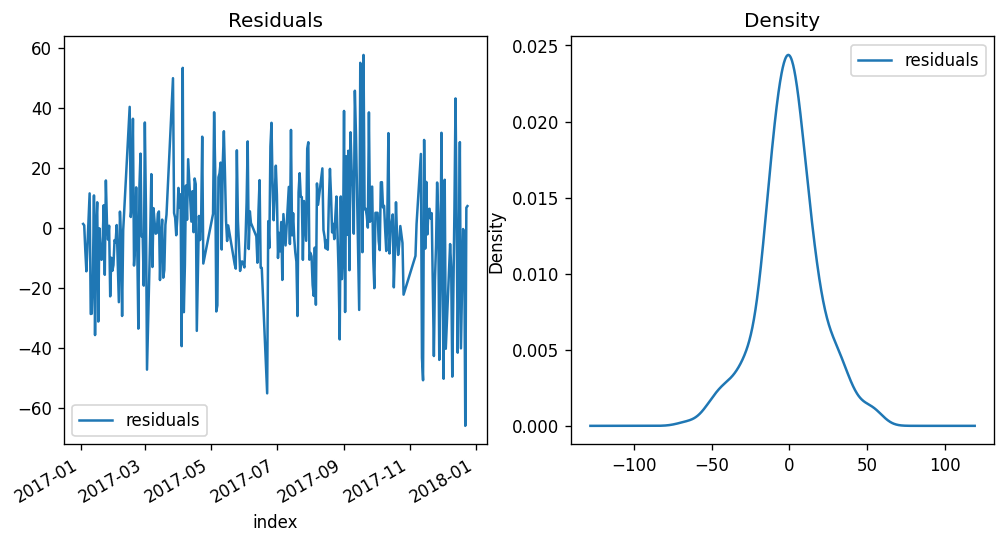



Residuals mean is: -0.0008044486611397758


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.rename(columns={0:'residuals'}, inplace=True)
plt.figure(figsize=(15,4))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.legend()
plt.show()
print('\n')
print('Residuals mean is: {}'.format(float(residuals.mean())))

In [ ]:
pred = model_fit.predict(exog = Xtest, start = 284, end = 290)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



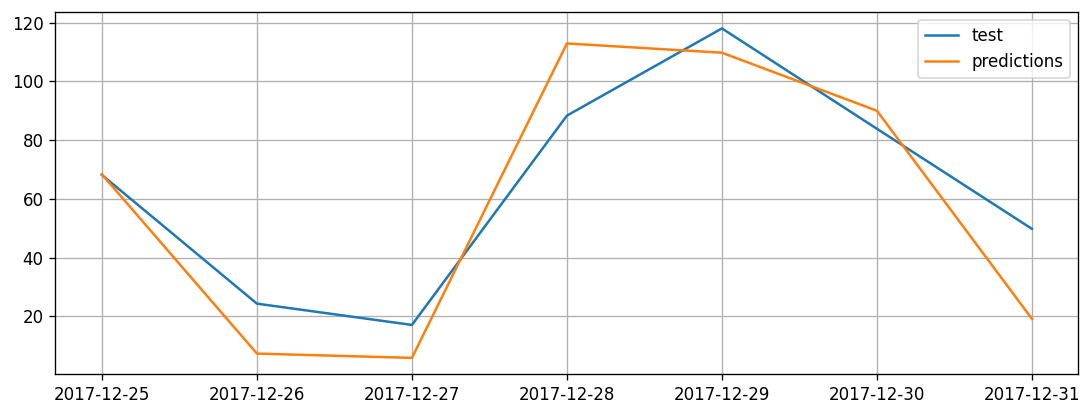

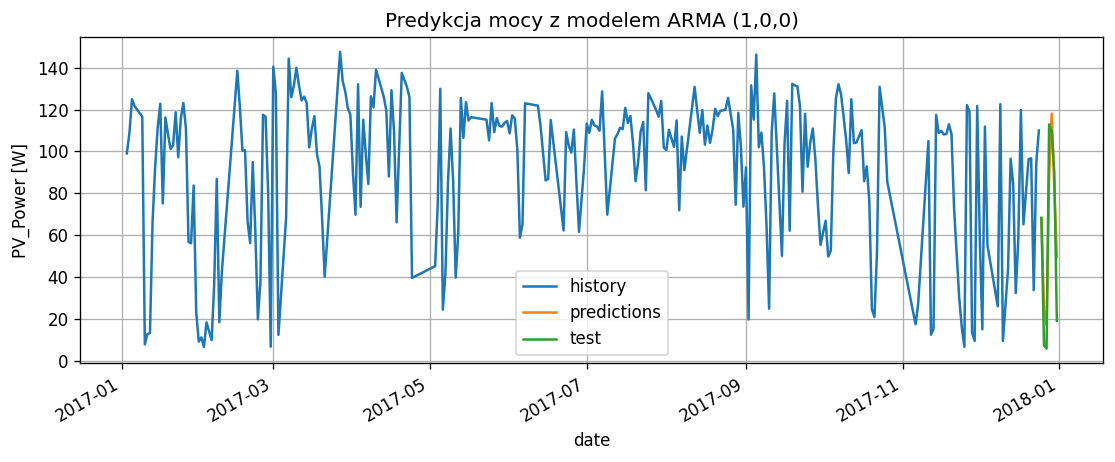

In [ ]:
plt.figure(figsize=(11,4))
plt.plot(Ytest.index, pred, label = 'test')
plt.plot(Ytest.index, Ytest, label = 'predictions')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(11,4))
ax = Ytrain['2017-01-03':'2017-12-25'].plot(label='history')
plt.plot(Ytest.index, pred, label='predictions')
Ytest['2017-12-25':'2017-12-31'].plot(label='test')
plt.ylabel('PV_Power [W]')
plt.xlabel('date')
plt.title('Predykcja mocy z modelem ARMA (1,0,0)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as r2
RMSE_AR = round(sqrt(MSE(Ytest, pred)),2)
MSE_AR =  round(MSE(Ytest, pred),2)
MAE_AR = round(MAE(Ytest, pred),2)
R2_AR = round(r2(Ytest, pred),2)

print('\nRMSE danych testowych z modelem ARMA (1,0,0): {}'.format(RMSE_AR))
print('\nMSE danych testowych z modelem ARMA (1,0,0): {}'.format(MSE_AR))
print('\nMAE danych testowych z modelem ARMA (1,0,0): {}'.format(MAE_AR))
print('\nR2 danych testowych z modelem ARMA (1,0,0): {}'.format(R2_AR))


RMSE danych testowych z modelem ARMA (1,0,0): 17.18

MSE danych testowych z modelem ARMA (1,0,0): 295.16

MAE danych testowych z modelem ARMA (1,0,0): 14.02

R2 danych testowych z modelem ARMA (1,0,0): 0.85


# **LSTM**

In [ ]:
!pip install gdown
!pip install tensorflow-gpu
LSTM_df = dfconcatcopy.copy()
train, test = LSTM_df.iloc[0:284], LSTM_df.iloc[284:291]

     |████████████████████████████████| 454.3 MB 16 kB/s 


In [ ]:
from numpy import array
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

X_train = scaler.fit_transform(train[['Cloud Cover', 'Relative Humidity', 'Visibility']].to_numpy())
X_train = array(X_train).reshape(284, 1, 3)
Y_train = scaler.fit_transform(train[['PV_Power']].to_numpy())
X_test = scaler.fit_transform(test[['Cloud Cover', 'Relative Humidity', 'Visibility']].to_numpy())
X_test = array(X_test).reshape(7, 1, 3)
Y_test = scaler.fit_transform(test[['PV_Power']].to_numpy())

In [ ]:
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras import Sequential
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 3)))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 2s 82ms/step - loss: 0.4630 - val_loss: 0.2952
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4227 - val_loss: 0.2638
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3873 - val_loss: 0.2330
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3251 - val_loss: 0.2023
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2960 - val_loss: 0.1728
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2446 - val_loss: 0.1465
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2052 - val_loss: 0.1257
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1664 - val_loss: 0.1144
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1288 - val_loss: 0.1110
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0953 - val_loss: 0.1180
Epoch 11/1000
8/8 

In [ ]:
y_pred = model.predict(X_test, verbose = 0)
y_train_inv=scaler.inverse_transform(Y_train)
y_test_inv=scaler.inverse_transform(Y_test)
y_pred_inv=scaler.inverse_transform(y_pred)

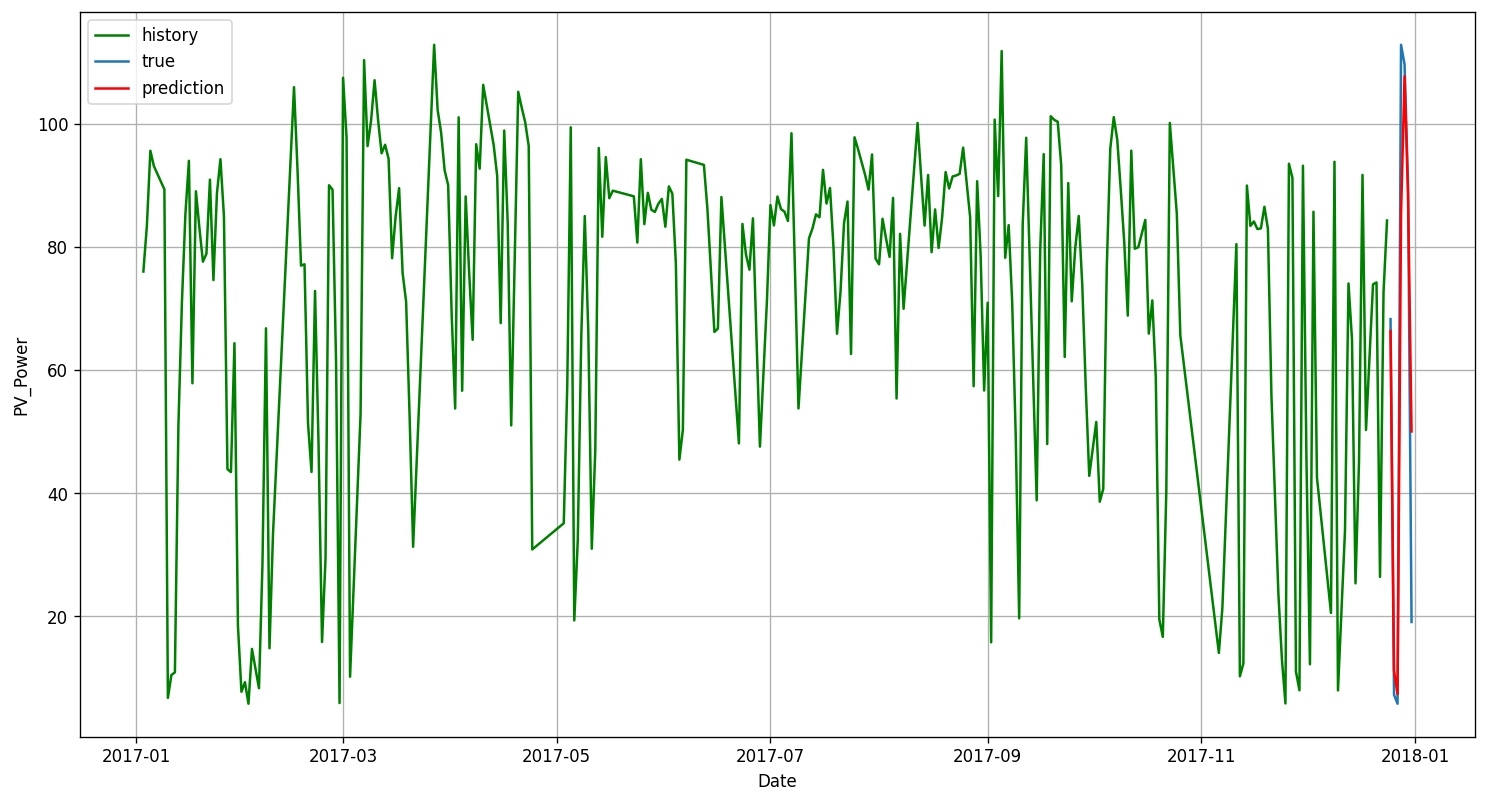

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train.index, y_train_inv.flatten(), 'g', label="history")
plt.plot(test.index, y_test_inv.flatten(), label="true")
plt.plot(test.index, y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('PV_Power [W]')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.show();

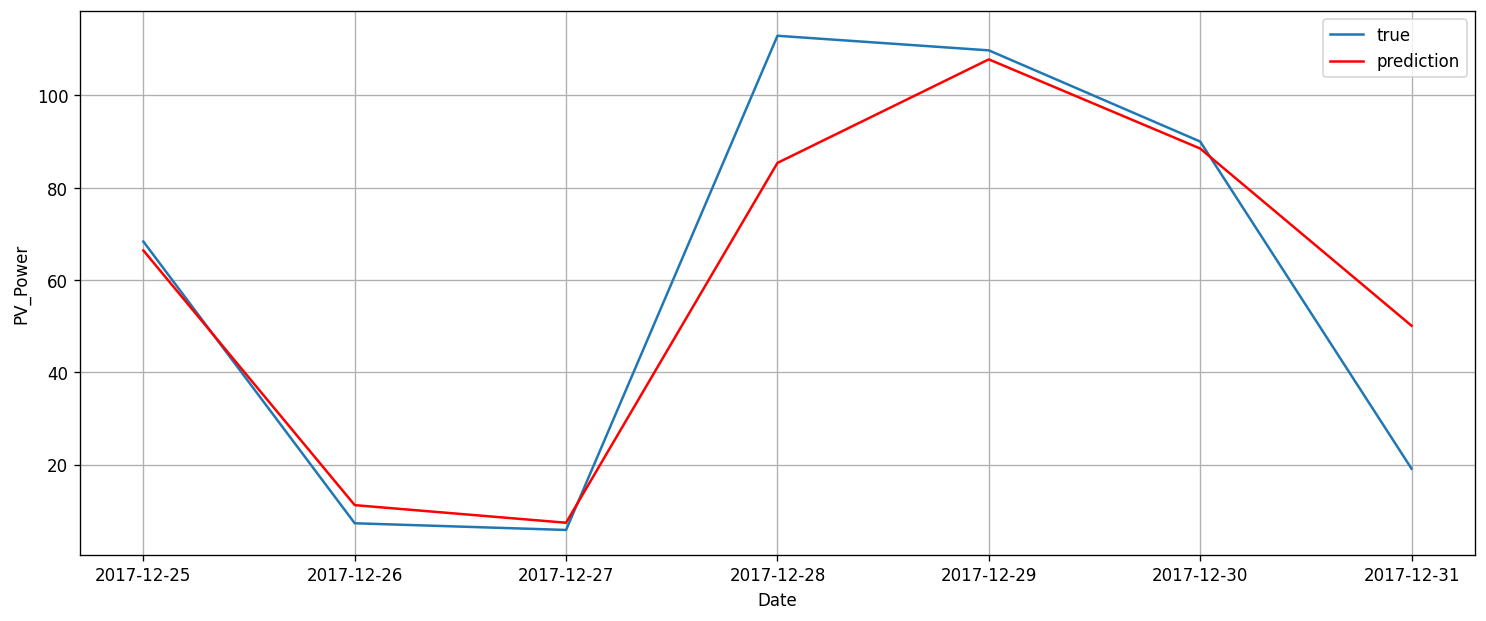

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(test.index,y_test_inv.flatten(), label="true")
plt.plot(test.index,y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('PV_Power [W]')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show();

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
RMSE_LSTMB = round(sqrt(MSE(y_test_inv.flatten(), y_pred_inv.flatten())),2)
MSE_LSTMB =  round(MSE(y_test_inv.flatten(), y_pred_inv.flatten()),2)
MAE_LSTMB = round(MAE(y_test_inv.flatten(), y_pred_inv.flatten()),2)
R2_LSTMB = round(r2(y_test_inv.flatten(), y_pred_inv.flatten()),2)

print('\nRMSE danych testowych z siecia LSTMB : {}'.format(RMSE_LSTMB))
print('\nMSE danych testowych z siecia LSTMB : {}'.format(MSE_LSTMB))
print('\nMAE danych testowych z siecia LSTMB : {}'.format(MAE_LSTMB))
print('\nR2 danych testowych z siecia LSTMB : {}'.format(R2_LSTMB))


RMSE danych testowych z siecia LSTMB : 15.79

MSE danych testowych z siecia LSTMB : 249.38

MAE danych testowych z siecia LSTMB : 9.91

R2 danych testowych z siecia LSTMB : 0.87


---

---

2 warstwy ukryte

---

In [ ]:
import keras
from keras.layers import LSTM, Dense
import numpy as np

model = keras.Sequential()

model.add(LSTM(50, activation='relu', input_shape=(1, 3)))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation= 'linear'))
model.compile(optimizer='adam', loss='mse')

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2, verbose = 1)

Epoch 1/1000
8/8 [==============================] - 3s 88ms/step - loss: 0.4527 - val_loss: 0.2929
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4102 - val_loss: 0.2480
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.3533 - val_loss: 0.1961
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2662 - val_loss: 0.1515
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2167 - val_loss: 0.1177
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1562 - val_loss: 0.0969
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1192 - val_loss: 0.0891
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0880 - val_loss: 0.0926
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0695 - val_loss: 0.1001
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.1044
Epoch 11/1000
8/8 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



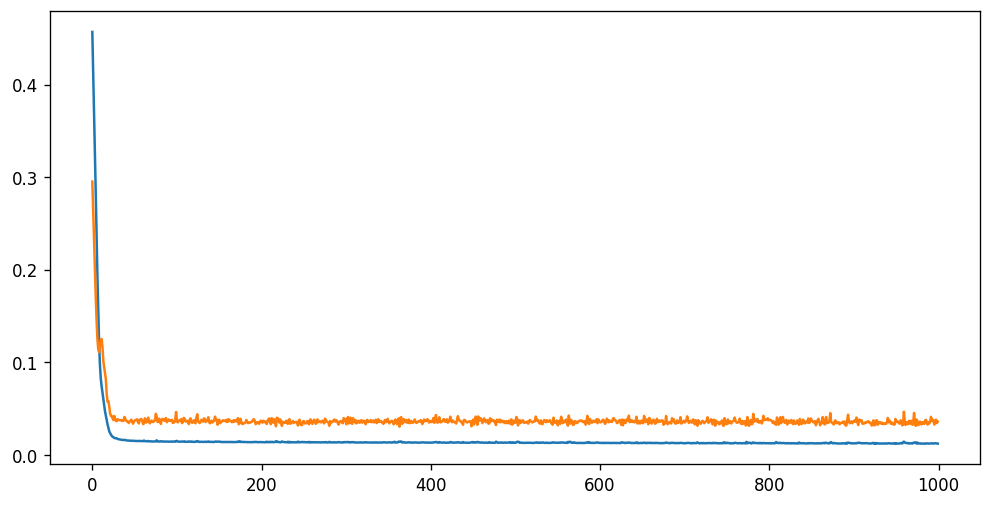

In [ ]:
history.history['loss']
sns.lineplot(np.arange(len(history.history['loss'])),history.history['loss'])
sns.lineplot(np.arange(len(history.history['val_loss'])),history.history['val_loss'])

keras.callbacks

In [ ]:
y_pred = model.predict(X_test, verbose = 0)
y_train_inv=scaler.inverse_transform(Y_train)
y_test_inv=scaler.inverse_transform(Y_test)
y_pred_inv=scaler.inverse_transform(y_pred)

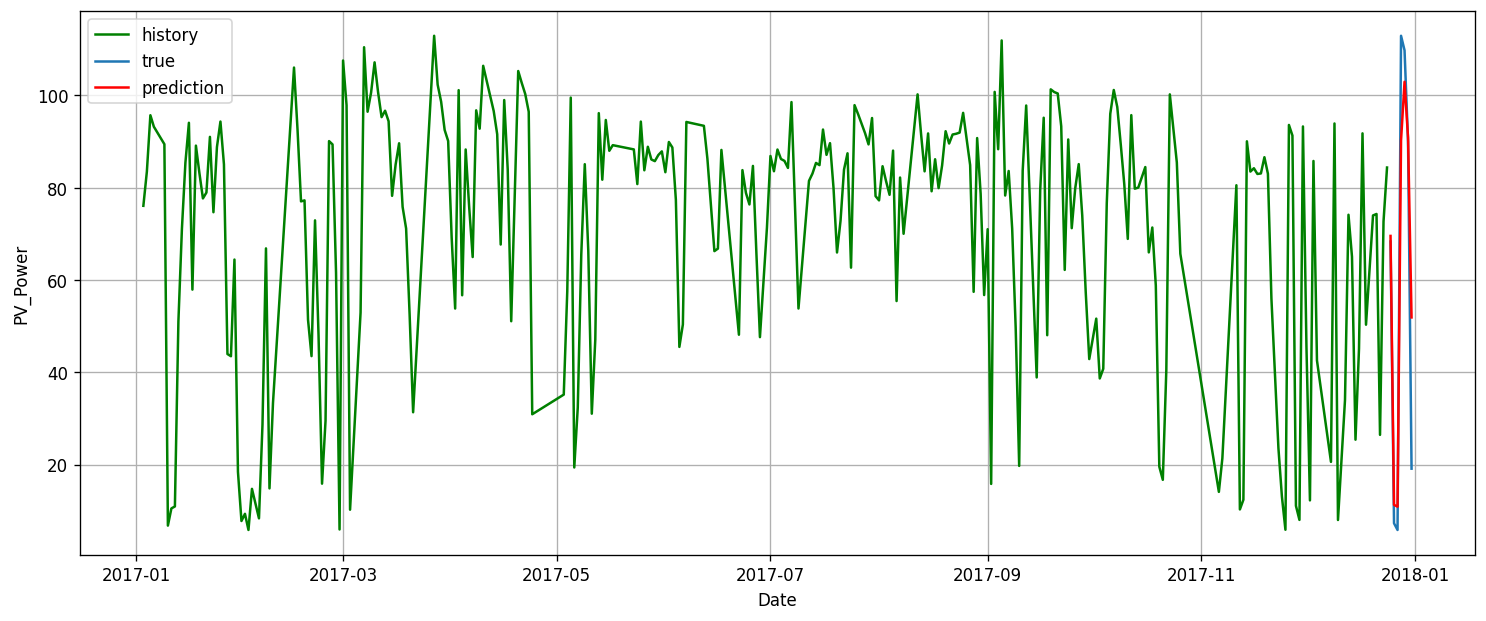

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train.index, y_train_inv.flatten(), 'g', label="history")
plt.plot(test.index, y_test_inv.flatten(), label="true")
plt.plot(test.index, y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('PV_Power [W]')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.show();

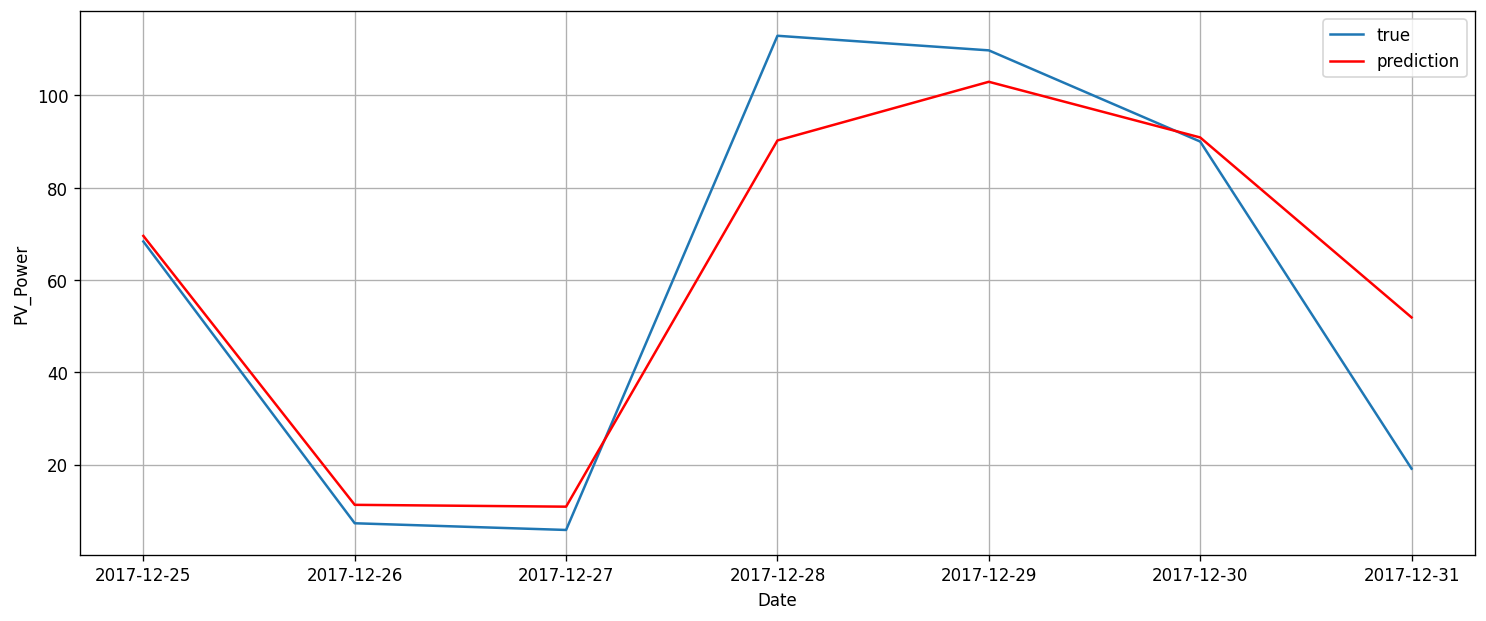

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(test.index,y_test_inv.flatten(), label="true")
plt.plot(test.index,y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('PV_Power [W]')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show();

In [ ]:
RMSE_LSTM = round(sqrt(MSE(y_test_inv.flatten(), y_pred_inv.flatten())),2)
MSE_LSTM =  round(MSE(y_test_inv.flatten(), y_pred_inv.flatten()),2)
MAE_LSTM = round(MAE(y_test_inv.flatten(), y_pred_inv.flatten()),2)
R2_LSTM = round(r2(y_test_inv.flatten(), y_pred_inv.flatten()),2)

print('\nRMSE danych testowych z siecia LSTM : {}'.format(RMSE_LSTM))
print('\nMSE danych testowych z siecia LSTM : {}'.format(MSE_LSTM))
print('\nMAE danych testowych z siecia LSTM : {}'.format(MAE_LSTM))
print('\nR2 danych testowych z siecia LSTM : {}'.format(R2_LSTM))


RMSE danych testowych z siecia LSTM : 15.49

MSE danych testowych z siecia LSTM : 239.8

MAE danych testowych z siecia LSTM : 10.49

R2 danych testowych z siecia LSTM : 0.88


 ---
 
 **Metryki błędów - Porównanie**

 ---

In [ ]:
LOSS_df = pd.DataFrame({'RMSE':[RMSE_RL,RMSE_AR, RMSE_LSTMB, RMSE_LSTM],
                        'MSE':[MSE_RL,MSE_AR, MSE_LSTMB, MSE_LSTM],
                        'MAE':[MAE_RL,MAE_AR, MAE_LSTMB, MAE_LSTM],
                        'R2':[R2_RL,R2_AR, R2_LSTMB, R2_LSTM]})
index = pd.Index(['Linear Regression', 'ARIMA (1,0,0)', 'LSTM_1', 'LSTM-2'])
LOSS_df = LOSS_df.set_index(index)
LOSS_df

,RMSE,MSE,MAE,R2
Linear Regression,17.77,315.67,14.68,0.84
"ARIMA (1,0,0)",17.18,295.16,14.02,0.85
LSTM_1,15.79,249.38,9.91,0.87
LSTM-2,15.49,239.80,10.49,0.88


---
---
Najlepszy model - sieć LSTM z 2 warstwami ukrytymi
---
---
---
